In [1]:
import pandas as pd

import plotly.express as px
from IPython.display import Image

pd.options.display.max_rows = 500
pd.options.mode.chained_assignment = None

# Reconciling and Analysis of Canons

The raw data created in the previous notebooks for the reconciliation of German, French, and English canons still need to be harmonized in order to create the final canons used on the search corpus to be built in the next step. For this we need to fix some misascriptions of Wikidata ids to individuals and resolve cases in which two names are legitimately associated with one and the same Wikidata id. We then harmonize the number of persons contained in a canon(100 for the canons dealing with all works in one language, 40 for disciplinary canons in one language).

Next we create various dataframes containing the overlaps between various canon lists. We do not yet materialise them, but use them instead to create figures which show the quantitative relations between the numbers of person contained in two language or disciplinary canons (e. g. the number of persons to be found only in one of the general canons or in two canons for different languages or in all three language canons). 

## Fix wrong Wikidata ids

In [2]:
def read_canon(path):
    """
    Read canon file and remove undesired columns and duplicates.
    """
    df_1 = pd.read_csv(path).drop(columns = ["Unnamed: 0"])
    if "index" in df_1.columns:
        df_1.drop(columns = ["index"], inplace = True)
    df_2 = df_1.drop_duplicates(subset = ["Name", "item"])
    return(df_2)

canon_ger_all = read_canon("output/canrec_ger_all.csv")
canon_fren_all = read_canon("output/canrec_fren_all.csv")
canon_eng_all = read_canon("output/canrec_eng_all.csv")

canon_ger_lit = read_canon("output/canrec_ger_lit.csv")
canon_fren_lit = read_canon("output/canrec_fren_lit.csv")
canon_eng_lit = read_canon("output/canrec_eng_lit.csv")

canon_ger_phil = read_canon("output/canrec_ger_phil.csv")
canon_fren_phil = read_canon("output/canrec_fren_phil.csv")
canon_eng_phil = read_canon("output/canrec_eng_phil.csv")

canon_ger_oth = read_canon("output/canrec_ger_oth.csv")
canon_fren_oth = read_canon("output/canrec_fren_oth.csv")
canon_eng_oth = read_canon("output/canrec_eng_oth.csv")

In [3]:
# We have left this here in order to document our methods. 
# No duplicates are to be found in the data, so we no longer use this function to detect them.

def show_dups(df):
    """
    Show duplicated entries.
    """
    return(df[df.duplicated(subset = ["Name"], keep = False)])

In [4]:
def remove_dups(df, name, item):
    """
    Remove wrong matches of name and Wikidata id
    """
    return(df[~((df["Name"] == name) &
                (df["item"] == item))])

canon_fren_all = remove_dups(canon_fren_all, "Spinoza", "http://www.wikidata.org/entity/Q79759")
canon_fren_all = remove_dups(canon_fren_all, "Necker", "http://www.wikidata.org/entity/Q123041")
canon_fren_all = remove_dups(canon_fren_all, "Haller", "http://www.wikidata.org/entity/Q7742")
canon_fren_phil = remove_dups(canon_fren_phil, "Haller", "http://www.wikidata.org/entity/Q7742")
canon_fren_oth = remove_dups(canon_fren_oth, "Haller", "http://www.wikidata.org/entity/Q7742")
canon_eng_oth = remove_dups(canon_eng_oth, "Adams", "http://www.wikidata.org/entity/Q9381")
canon_eng_oth = remove_dups(canon_eng_oth, "Spinoza", "http://www.wikidata.org/entity/Q79759")

In [5]:
def show_doubles(df):
    """
    Show entries with same Wikidata id and different names
    """
    return(df[df.duplicated(subset = ["item"], keep = False)])

## Two names, one Wikidata id.

In [6]:
def reconc_names(df, name_1, name_2, item):
    """
    Creates a row with sum of counts for two names with one id.
    """
    df_1 = df[df["item"] == item]
    df_1["Count_new"] = df_1["Count"].sum()
    df_2 = df_1.drop_duplicates(subset = ["item"])
    df_2["Count"] = df_2["Count_new"]
    df_minus = df[df["item"] != item]
    result = pd.concat([df_2, df_minus]).sort_values(by = "Count", ascending = False)
    return(result.reset_index(drop = True).drop(columns = "Count_new"))
canon_fren_all = reconc_names(canon_fren_all, 
                              "Napoléon", "Bonaparte",
                              "http://www.wikidata.org/entity/Q517")
canon_fren_all = reconc_names(canon_fren_all,
                             "Maupertuis", "Moreau",
                             "http://www.wikidata.org/entity/Q164374")

In [7]:
canon_ger_phil = reconc_names(canon_ger_phil,
                             "Plato", "Platon",
                             "http://www.wikidata.org/entity/Q859")

In [8]:
canon_fren_phil = reconc_names(canon_fren_all, 
                              "Napoléon", "Bonaparte",
                              "http://www.wikidata.org/entity/Q517")
canon_fren_phil = reconc_names(canon_fren_all,
                             "Maupertuis", "Moreau",
                             "http://www.wikidata.org/entity/Q164374")

In [9]:
canon_eng_phil = reconc_names(canon_eng_phil,
                             "Plato", "Platon",
                             "http://www.wikidata.org/entity/Q859")

In [10]:
canon_fren_oth = reconc_names(canon_fren_oth, 
                              "Napoléon", "Bonaparte",
                              "http://www.wikidata.org/entity/Q517")
canon_fren_oth = reconc_names(canon_fren_oth,
                             "Maupertuis", "Moreau",
                             "http://www.wikidata.org/entity/Q164374")

## Harmonize numbers; output

In [11]:
canon_fren_all = canon_fren_all.head(100)

canon_ger_lit = canon_ger_lit.head(40)
canon_ger_phil = canon_ger_phil.head(40)
canon_ger_oth = canon_ger_oth.head(40)

canon_fren_lit = canon_fren_lit.head(40)
canon_fren_phil = canon_fren_phil.head(40)
canon_fren_oth = canon_fren_oth.head(40)

canon_eng_lit = canon_eng_lit.head(40)
canon_eng_phil = canon_eng_phil.head(40)
canon_eng_oth = canon_eng_oth.head(40)

In [12]:
# Output

canon_ger_all.to_csv("output/canfin_ger_all.csv")
canon_fren_all.to_csv("output/canfin_fren_all.csv")
canon_eng_all.to_csv("output/canfin_eng_all.csv")

canon_ger_lit.to_csv("output/canfin_ger_lit.csv")
canon_ger_phil.to_csv("output/canfin_ger_phil.csv")
canon_ger_oth.to_csv("output/canfin_ger_oth.csv")

canon_fren_lit.to_csv("output/canfin_fren_lit.csv")
canon_fren_phil.to_csv("output/canfin_fren_phil.csv")
canon_fren_oth.to_csv("output/canfin_fren_oth.csv")

canon_eng_lit.to_csv("output/canfin_eng_lit.csv")
canon_eng_phil.to_csv("output/canfin_eng_phil.csv")
canon_eng_oth.to_csv("output/canfin_eng_oth.csv")

## Overlaps between language and disciplinary canons

In [13]:
def shared_all(df_ger, df_fren, df_eng):
    """
    Create df with authors in all three languages.
    """
    df_1 = df_ger.merge(df_fren[["Name", "Full name", "Count", "item", "label"]], on = "item")
    df_2 = df_1.merge(df_eng[["Name", "Full name", "Count", "item", "label"]], on = "item")
    df_2.columns = ["Name German", "Count German", "Full name German", "item", 
                   "gnd", "dod", "dob", "Label German", "yob", "yod", "Name French", "Full name French",
                   "Count French", "Label French", "Name English", "Full name English",
                   "Count English", "Label English"]
    df_3 = df_2[["Name German", "Name French", "Name English", "Full name German", "Full name French",
                "Full name English", "Count German", "Count French", "Count English", "yob", "yod",
                "item", "Label German", "Label French", "Label English"]]
    return(df_3)

all_in_all = shared_all(canon_ger_all, canon_fren_all, canon_eng_all)
all_in_all.to_csv("output/all_in_all.csv")
all_in_all

Name German  Name French Name English             Full name German  \
0          Kant         Kant         Kant                Immanuel Kant   
1       Lessing      Lessing      Lessing              Ephraim Lessing   
2        Goethe       Goethe       Goethe       Johann Wolfgang Goethe   
3      Rousseau     Rousseau     Rousseau        Jean-Jacques Rousseau   
4   Mendelssohn  Mendelssohn  Mendelssohn            Moses Mendelssohn   
5       Diderot      Diderot      Diderot                Denis Diderot   
6       Leibniz      Leibniz      Leibniz    Gottfried Wilhelm Leibniz   
7         Hegel        Hegel        Hegel               G. W. F. Hegel   
8      Voltaire     Voltaire     Voltaire                     Voltaire   
9       Spinoza      Spinoza      Spinoza               Baruch Spinoza   
10  Montesquieu  Montesquieu  Montesquieu               de Montesquieu   
11         Hume         Hume         Hume                   David Hume   
12        Plato       Platon        Plato                        Plato   
13        Locke        Locke        Locke                   John Locke   
14       Newton       Newton       Newton                 Isaac Newton   
15    Descartes    Descartes    Descartes               René Descartes   
16       Hobbes       Hobbes       Hobbes                Thomas Hobbes   
17        Bayle        Bayle        Bayle                 Pierre Bayle   
18       Cicero      Cicéron       Cicero        Marcus Tullius Cicero   
19        Horaz       Horace       Horace                        Horaz   
20    Condillac    Condillac    Condillac  Etienne Bonnot de Condillac   
21   Fontenelle   Fontenelle   Fontenelle                de Fontenelle   
22      Holbach      Holbach      Holbach         Paul Thiry d'Holbach   
23    Helvétius    Helvétius    Helvétius                    Helvétius   

            Full name French            Full name English  Count German  \
0              Emmanuel Kant                Immanuel Kant         37455   
1   Gotthold Ephraim Lessing     Gotthold Ephraim Lessing         28636   
2                     Goethe   Johann Wolfgang von Goethe         25806   
3      Jean-Jacques Rousseau        Jean-Jacques Rousseau         19429   
4          Moses Mendelssohn            Moses Mendelssohn         17949   
5              Denis Diderot                Denis Diderot         15318   
6                    Leibniz    Gottfried Wilhelm Leibniz         12555   
7                      Hegel               G. W. F. Hegel          7768   
8                de Voltaire                  de Voltaire          7403   
9                    Spinoza          Benedict de Spinoza          5380   
10            de Montesquieu                  Montesquieu          5084   
11                David Hume                   David Hume          4950   
12                    Platon                        Plato          4891   
13                John Locke                   John Locke          4659   
14              Isaac Newton                 Isaac Newton          4517   
15            René Descartes               René Descartes          4185   
16             Thomas Hobbes                Thomas Hobbes          3617   
17              Pierre Bayle                 Pierre Bayle          2916   
18                   Cicéron                       Cicero          2241   
19                    Horace                       Horace          2239   
20                 Condillac  Etienne Bonnot de Condillac          2088   
21                Fontenelle                de Fontenelle          1959   
22                   Holbach              Baron d'Holbach          1801   
23                 Helvétius                    Helvétius          1424   

    Count French  Count English   yob    yod  \
0           4970          13790  1724   1804   
1           2799          11050  1729   1781   
2           1620           6125  1749   1832   
3          24539         118271  1712   1778   
4            971           4447  1729

In [14]:
lit_in_all = shared_all(canon_ger_lit, canon_fren_lit, canon_eng_lit)
lit_in_all.to_csv("output/lit_in_all.csv")
lit_in_all

Name German Name French Name English        Full name German  \
0      Goethe      Goethe       Goethe  Johann Wolfgang Goethe   
1     Lessing     Lessing      Lessing         Ephraim Lessing   
2        Kant        Kant         Kant           Immanuel Kant   
3    Rousseau    Rousseau     Rousseau   Jean-Jacques Rousseau   
4     Diderot     Diderot      Diderot           Denis Diderot   
5    Voltaire    Voltaire     Voltaire             de Voltaire   

           Full name French           Full name English  Count German  \
0                    Goethe  Johann Wolfgang von Goethe         15955   
1  Gotthold Ephraim Lessing    Gotthold Ephraim Lessing         15032   
2             Emmanuel Kant               Immanuel Kant          7400   
3     Jean-Jacques Rousseau       Jean-Jacques Rousseau          6502   
4             Denis Diderot               Denis Diderot          5591   
5               de Voltaire                    Voltaire          2844   

   Count French  Count English   yob   yod  \
0           823           1688  1749  1832   
1           962           6593  1729  1781   
2           867           2006  1724  1804   
3         11720           6416  1712  1778   
4         11925           4763  1713  1784   
5          8352           5549  1694  1778   

                                    item                Label German  \
0   http://www.wikidata.org/entity/Q5879  Johann Wolfgang von Goethe   
1  http://www.wikidata.org/entity/Q34628    Gotthold Ephraim Lessing   
2   http://www.wikidata.org/entity/Q9312               Immanuel Kant   
3   http://www.wikidata.org/entity/Q6527       Jean-Jacques Rousseau   
4    http://www.wikidata.org/entity/Q448               Denis Diderot   
5   http://www.wikidata.org/entity/Q9068                    Voltaire   

                 Label French               Label English  
0  Johann Wolfgang von Goethe  Johann Wolfgang von Goethe  
1    Gotthold Ephraim Lessing    Gotthold Ephraim Lessing  
2               Emmanuel Kant               Immanuel Kant  
3       Jean-Jacques Rousseau       Jean-Jacques Rousseau  
4               Denis Diderot               Denis Diderot  
5                    Voltaire                    Voltaire

In [15]:
phil_in_all = shared_all(canon_ger_phil, canon_fren_phil, canon_eng_phil)
phil_in_all.to_csv("output/phil_in_all.csv")
phil_in_all

Name German  Name French Name English           Full name German  \
0          Kant         Kant         Kant              Immanuel Kant   
1      Rousseau     Rousseau     Rousseau      Jean-Jacques Rousseau   
2       Leibniz      Leibniz      Leibniz  Gottfried Wilhelm Leibniz   
3       Diderot      Diderot      Diderot              Denis Diderot   
4       Lessing      Lessing      Lessing              G. E. Lessing   
5     Descartes    Descartes    Descartes             René Descartes   
6        Newton       Newton       Newton               Isaac Newton   
7      Voltaire     Voltaire     Voltaire                   Voltaire   
8       Spinoza      Spinoza      Spinoza          Baruch de Spinoza   
9         Locke        Locke        Locke                 John Locke   
10  Montesquieu  Montesquieu  Montesquieu             de Montesquieu   

            Full name French          Full name English  Count German  \
0              Emmanuel Kant              Immanuel Kant         17882   
1      Jean-Jacques Rousseau      Jean-Jacques Rousseau          7213   
2                    Leibniz  Gottfried Wilhelm Leibniz          6042   
3              Denis Diderot              Denis Diderot          5777   
4   Gotthold Ephraim Lessing   Gotthold Ephraim Lessing          2831   
5             René Descartes             René Descartes          2605   
6               Isaac Newton               Isaac Newton          2308   
7                de Voltaire                   Voltaire          2224   
8                    Spinoza             Baruch Spinoza          2122   
9                 John Locke                 John Locke          2073   
10            de Montesquieu                Montesquieu          1268   

    Count French  Count English   yob   yod  \
0           4970           5562  1724  1804   
1          24539           9808  1712  1778   
2           2504           2914  1646  1716   
3          20775           9618  1713  1784   
4           2799           4178  1729  1781   
5           4089           4337  1596  1650   
6           3398           3865  1643  1727   
7          29552          10292  1694  1778   
8           2828           1203  1632  1677   
9           3335           6009  1632  1704   
10         10463           5098  1689  1755   

                                     item  \
0    http://www.wikidata.org/entity/Q9312   
1    http://www.wikidata.org/entity/Q6527   
2    http://www.wikidata.org/entity/Q9047   
3     http://www.wikidata.org/entity/Q448   
4   http://www.wikidata.org/entity/Q34628   
5    http://www.wikidata.org/entity/Q9191   
6     http://www.wikidata.org/entity/Q935   
7    http://www.wikidata.org/entity/Q9068   
8   http://www.wikidata.org/entity/Q35802   
9    http://www.wikidata.org/entity/Q9353   
10  http://www.wikidata.org/entity/Q15975   

                                 Label German               Label French  \
0                               Immanuel Kant              Emmanuel Kant   
1                       Jean-Jacques Rousseau      Jean-Jacques Rousseau   
2                   Gottfried Wilhelm Leibniz  Gottfried Wilhelm Leibniz   
3                               Denis Diderot              Denis Diderot   
4                    Gotthold Ephraim Lessing   Gotthold Ephraim Lessing   
5                              René Descartes             René Descartes   
6                                Isaac Newton               Isaac Newton   
7                                    Voltaire                   Voltaire   
8                       Benedictus de Spinoza          Baruch de Spinoza   
9                                  John Locke                 John Locke   
10  Charles de Secondat, Baron de Montesquieu                Montesquieu   

                Label English  
0               Immanuel Kant  
1       Jean-Jacques Rousseau  
2   Gottfried Wilhelm Leibniz  
3               Denis Diderot  
4    Gotthold Ephraim Lessing  
5              René Descartes  
6                Is

In [16]:
oth_in_all = shared_all(canon_ger_oth, canon_fren_oth, canon_eng_oth)
oth_in_all.to_csv("output/oth_in_all.csv")
oth_in_all

Name German  Name French Name English           Full name German  \
0         Kant         Kant         Kant              Immanuel Kant   
1     Rousseau     Rousseau     Rousseau      Jean-Jacques Rousseau   
2      Diderot      Diderot      Diderot              Denis Diderot   
3      Lessing      Lessing      Lessing            Ephraim Lessing   
4      Leibniz      Leibniz      Leibniz  Gottfried Wilhelm Leibniz   
5  Montesquieu  Montesquieu  Montesquieu             de Montesquieu   
6       Newton       Newton       Newton               Isaac Newton   

           Full name French          Full name English  Count German  \
0             Emmanuel Kant              Immanuel Kant          5241   
1     Jean-Jacques Rousseau      Jean-Jacques Rousseau          4679   
2             Denis Diderot              Denis Diderot          3445   
3  Gotthold Ephraim Lessing   Gotthold Ephraim Lessing          3376   
4                   Leibniz  Gottfried Wilhelm Leibniz          2146   
5            de Montesquieu                Montesquieu          1805   
6              Isaac Newton               Isaac Newton          1139   

   Count French  Count English   yob   yod  \
0          1475           3485  1724  1804   
1          9412          15857  1712  1778   
2          5459           7250  1713  1784   
3          1115           1558  1729  1781   
4           895           1556  1646  1716   
5          5118           5275  1689  1755   
6          1505           4669  1643  1727   

                                    item  \
0   http://www.wikidata.org/entity/Q9312   
1   http://www.wikidata.org/entity/Q6527   
2    http://www.wikidata.org/entity/Q448   
3  http://www.wikidata.org/entity/Q34628   
4   http://www.wikidata.org/entity/Q9047   
5  http://www.wikidata.org/entity/Q15975   
6    http://www.wikidata.org/entity/Q935   

                                Label German               Label French  \
0                              Immanuel Kant              Emmanuel Kant   
1                      Jean-Jacques Rousseau      Jean-Jacques Rousseau   
2                              Denis Diderot              Denis Diderot   
3                   Gotthold Ephraim Lessing   Gotthold Ephraim Lessing   
4                  Gottfried Wilhelm Leibniz  Gottfried Wilhelm Leibniz   
5  Charles de Secondat, Baron de Montesquieu                Montesquieu   
6                               Isaac Newton               Isaac Newton   

               Label English  
0              Immanuel Kant  
1      Jean-Jacques Rousseau  
2              Denis Diderot  
3   Gotthold Ephraim Lessing  
4  Gottfried Wilhelm Leibniz  
5                Montesquieu  
6               Isaac Newton

In [17]:
# German - French

def in_ger_fren(df_ger, df_fren, df_eng):
    """
    Persons only in German and French dfs.
    """
    df_1 = df_ger.merge(df_fren[["Name", "Full name", "Count", "item", "label"]], on = "item")
    df_2 = df_1[~(df_1["item"].isin(df_eng["item"].to_list()))]
   
    df_2.columns = ["Name German", "Count German", "Full name German", "item", 
                   "gnd", "dod", "dob", "Label German", "yob", "yod", "Name French", "Full name French",
                   "Count French", "Label French"]
    df_3 = df_2[["Name German", "Name French", "Full name German", "Full name French",
                "Count German", "Count French", "yob", "yod",
                "item", "Label German", "Label French"]]
    return(df_3)
                
ger_fren_in_all = in_ger_fren(canon_ger_all, canon_fren_all, canon_eng_all)
ger_fren_in_all.to_csv("output/ger_fren_in_all.csv")
ger_fren_in_all

Name German  Name French            Full name German  \
7         Herder       Herder     Johann Gottfried Herder   
8      Gottsched    Gottsched  Johann Christoph Gottsched   
19      Sokrates      Socrate                    Sokrates   
20  Friedrich II  Frédéric II                Friedrich II   
21     Joseph II    Joseph II                   Joseph II   
23      Napoleon     Napoléon                 Napoleon I.   
29     Montaigne    Montaigne         Michel de Montaigne   

         Full name French  Count German  Count French   yob    yod  \
7                  Herder          9383          1117  1744   1803   
8               Gottsched          8678           904  1700   1766   
19                Socrate          3282          1117  -468  -0398   
20  Frédéric II de Prusse          3232          1066  1712   1786   
21              Joseph II          3051          1028  1741   1790   
23     Napoléon Bonaparte          2592          3188  1769   1821   
29              Montaigne          1642          1467  1533   1592   

                                      item                Label German  \
7   http://www.wikidata.org/entity/Q155547     Johann Gottfried Herder   
8    http://www.wikidata.org/entity/Q76442  Johann Christoph Gottsched   
19     http://www.wikidata.org/entity/Q913                    Sokrates   
20   http://www.wikidata.org/entity/Q33550   Friedrich II. von Preußen   
21  https://www.wikidata.org/entity/Q76555                  Joseph II.   
23     http://www.wikidata.org/entity/Q517          Napoleon Bonaparte   
29   http://www.wikidata.org/entity/Q41568         Michel de Montaigne   

                   Label French  
7   Johann Gottfried von Herder  
8    Johann Christoph Gottsched  
19                      Socrate  
20        Frédéric II de Prusse  
21                    Joseph II  
23                 Napoléon Ier  
29          Michel de Montaigne

In [18]:
ger_fren_lit = in_ger_fren(canon_ger_lit, canon_fren_lit, canon_eng_lit)
ger_fren_lit.to_csv("output/ger_fren_lit.csv")
ger_fren_lit

Name German Name French Full name German Full name French  Count German  \
6       Horaz      Horace            Horaz           Horace          1505   

   Count French  yob  yod                                  item Label German  \
6           856  -64   -7  http://www.wikidata.org/entity/Q6197        Horaz   

  Label French  
6       Horace

In [19]:
ger_fren_phil = in_ger_fren(canon_ger_phil, canon_fren_phil, canon_eng_phil)
ger_fren_phil.to_csv("output/ger_fren_phil.csv")
ger_fren_phil

Name German Name French      Full name German Full name French  \
11     Holbach     Holbach  Paul Thiry d'Holbach          Holbach   

    Count German  Count French   yob   yod  \
11          1151          2593  1723  1789   

                                    item                Label German  \
11  http://www.wikidata.org/entity/Q7104  Paul Henri Thiry d’Holbach   

                  Label French  
11  Paul Henri Thiry d’Holbach

In [20]:
ger_fren_oth = in_ger_fren(canon_ger_oth, canon_fren_oth, canon_eng_oth)
ger_fren_oth.to_csv("output/ger_fren_oth.csv")
ger_fren_oth

Name German Name French Full name German    Full name French  Count German  \
6    Napoleon    Napoléon      Napoleon I.  Napoléon Bonaparte          1322   

   Count French   yob   yod                                 item  \
6          2103  1769  1821  http://www.wikidata.org/entity/Q517   

         Label German  Label French  
6  Napoleon Bonaparte  Napoléon Ier

In [21]:
# German - English

def in_ger_eng(df_ger, df_fren, df_eng):
    """
    Persons only in German and English dfs.
    """
    df_1 = df_ger.merge(df_eng[["Name", "Full name", "Count", "item", "label"]], on = "item")
    df_2 = df_1[~(df_1["item"].isin(df_fren["item"].to_list()))]
   
    df_2.columns = ["Name German", "Count German", "Full name German", "item", 
                   "gnd", "dod", "dob", "Label German", "yob", "yod", "Name English", "Full name English",
                   "Count English", "Label English"]
    df_3 = df_2[["Name German", "Name English", "Full name German", "Full name English",
                "Count German", "Count English", "yob", "yod",
                "item", "Label German", "Label English"]]
    return(df_3)
                
ger_eng_in_all = in_ger_eng(canon_ger_all, canon_fren_all, canon_eng_all)
ger_eng_in_all.to_csv("output/ger_eng_in_all.csv")
ger_eng_in_all

Name German Name English         Full name German  \
5         Wolff        Wolff          Christian Wolff   
11       Mozart       Mozart  Wolfgang Amadeus Mozart   
17         Marx         Marx                Karl Marx   
20        Bacon        Bacon            Francis Bacon   
21  Shakespeare  Shakespeare      William Shakespeare   
22  Aristoteles    Aristotle              Aristoteles   
24  Shaftesbury  Shaftesbury      Earl of Shaftesbury   
31     Berkeley     Berkeley          George Berkeley   

          Full name English  Count German  Count English   yob    yod  \
5           Christian Wolff         16296           3576  1679   1754   
11  Wolfgang Amadeus Mozart          5314           2713  1756   1791   
17                Karl Marx          4370           3423  1818   1883   
20            Francis Bacon          3538           3713  1561   1626   
21      William Shakespeare          3496           6588  1564   1616   
22                Aristotle          3372           4560  -383  -0321   
24              Shaftesbury          2716           3492  1671   1713   
31          George Berkeley          1408           5818  1685   1753   

                                      item  \
5    http://www.wikidata.org/entity/Q76510   
11     http://www.wikidata.org/entity/Q254   
17    http://www.wikidata.org/entity/Q9061   
20   http://www.wikidata.org/entity/Q37388   
21     http://www.wikidata.org/entity/Q692   
22     http://www.wikidata.org/entity/Q868   
24  http://www.wikidata.org/entity/Q335112   
31   http://www.wikidata.org/entity/Q82049   

                                     Label German  \
5                                 Christian Wolff   
11                        Wolfgang Amadeus Mozart   
17                                      Karl Marx   
20                                  Francis Bacon   
21                            William Shakespeare   
22                                    Aristoteles   
24  Anthony Ashley-Cooper, 3. Earl of Shaftesbury   
31                                George Berkeley   

                                     Label English  
5                                  Christian Wolff  
11                         Wolfgang Amadeus Mozart  
17                                       Karl Marx  
20                                   Francis Bacon  
21                             William Shakespeare  
22                                       Aristotle  
24  Anthony Ashley-Cooper, 3rd Earl of Shaftesbury  
31                                 George Berkeley

In [22]:
ger_eng_lit = in_ger_eng(canon_ger_lit, canon_fren_lit, canon_eng_lit)
ger_eng_lit.to_csv("output/ger_eng_lit.csv")
ger_eng_lit

Name German Name English               Full name German  \
2       Wieland      Wieland       Christoph Martin Wieland   
3      Schiller     Schiller             Friedrich Schiller   
6     Gottsched    Gottsched     Johann Christoph Gottsched   
7       Gellert      Gellert  Christian Fürchtegott Gellert   
9     Klopstock    Klopstock   Friedrich Gottlieb Klopstock   
10     Schlegel     Schlegel             Friedrich Schlegel   
11       Mozart       Mozart        Wolfgang Amadeus Mozart   
12  Mendelssohn  Mendelssohn              Moses Mendelssohn   
14      Leibniz      Leibniz      Gottfried Wilhelm Leibniz   
15  Shakespeare  Shakespeare            William Shakespeare   

                Full name English  Count German  Count English   yob   yod  \
2        Christoph Martin Wieland         10173           1078  1733  1813   
3              Friedrich Schiller          8349           1130  1759  1805   
6      Johann Christoph Gottsched          6117            756  1700  1766   
7   Christian Fürchtegott Gellert          5628            743  1715  1769   
9    Friedrich Gottlieb Klopstock          4696            721  1724  1803   
10             Friedrich Schlegel          4169           1797  1772  1829   
11                   W. A. Mozart          4046           1019  1756  1791   
12              Moses Mendelssohn          3445           1109  1729  1786   
14      Gottfried Wilhelm Leibniz          2799            684  1646  1716   
15            William Shakespeare          2322           1548  1564  1616   

                                      item                   Label German  \
2   http://www.wikidata.org/entity/Q154010       Christoph Martin Wieland   
3    http://www.wikidata.org/entity/Q22670             Friedrich Schiller   
6    http://www.wikidata.org/entity/Q76442     Johann Christoph Gottsched   
7    http://www.wikidata.org/entity/Q60584  Christian Fürchtegott Gellert   
9   http://www.wikidata.org/entity/Q154367   Friedrich Gottlieb Klopstock   
10  http://www.wikidata.org/entity/Q157271             Friedrich Schlegel   
11     http://www.wikidata.org/entity/Q254        Wolfgang Amadeus Mozart   
12   http://www.wikidata.org/entity/Q76997              Moses Mendelssohn   
14    http://www.wikidata.org/entity/Q9047      Gottfried Wilhelm Leibniz   
15     http://www.wikidata.org/entity/Q692            William Shakespeare   

                    Label English  
2        Christoph Martin Wieland  
3              Friedrich Schiller  
6      Johann Christoph Gottsched  
7   Christian Fürchtegott Gellert  
9    Friedrich Gottlieb Klopstock  
10             Friedrich Schlegel  
11        Wolfgang Amadeus Mozart  
12              Moses Mendelssohn  
14      Gottfried Wilhelm Leibniz  
15            William Shakespeare

In [23]:
ger_eng_phil = in_ger_eng(canon_ger_phil, canon_fren_phil, canon_eng_phil)
ger_eng_phil.to_csv("output/ger_eng_phil.csv")
ger_eng_phil

Name German Name English        Full name German  \
4         Wolff        Wolff         Christian Wolff   
5         Plato        Plato                   Plato   
6         Hegel        Hegel          G. W. F. Hegel   
9          Hume         Hume              David Hume   
10         Marx         Marx               Karl Marx   
13  Mendelssohn  Mendelssohn       Moses Mendelssohn   
16       Hobbes       Hobbes           Thomas Hobbes   
17       Goethe       Goethe  Johann Wolfgang Goethe   
18  Aristoteles    Aristotle             Aristoteles   
19    Condillac    Condillac            de Condillac   

              Full name English  Count German  Count English   yob    yod  \
4               Christian Wolff          5144           1376  1679   1754   
5                         Plato          4808           2359  -426  -0346   
6                G. W. F. Hegel          4217           1822  1770   1831   
9                    David Hume          2542           8860  1711   1776   
10                    Karl Marx          2348            871  1818   1883   
13            Moses Mendelssohn          2174           1887  1729   1786   
16                Thomas Hobbes          2027            916  1588   1679   
17   Johann Wolfgang von Goethe          1792           1175  1749   1832   
18                    Aristotle          1625           1160  -383  -0321   
19  Etienne Bonnot de Condillac          1589           1461  1714   1780   

                                      item                   Label German  \
4    http://www.wikidata.org/entity/Q76510                Christian Wolff   
5      http://www.wikidata.org/entity/Q859                         Platon   
6     http://www.wikidata.org/entity/Q9235  Georg Wilhelm Friedrich Hegel   
9    http://www.wikidata.org/entity/Q37160                     David Hume   
10    http://www.wikidata.org/entity/Q9061                      Karl Marx   
13   http://www.wikidata.org/entity/Q76997              Moses Mendelssohn   
16   http://www.wikidata.org/entity/Q37621                  Thomas Hobbes   
17    http://www.wikidata.org/entity/Q5879     Johann Wolfgang von Goethe   
18     http://www.wikidata.org/entity/Q868                    Aristoteles   
19  http://www.wikidata.org/entity/Q272119    Étienne Bonnot de Condillac   

                    Label English  
4                 Christian Wolff  
5                           Plato  
6   Georg Wilhelm Friedrich Hegel  
9                      David Hume  
10                      Karl Marx  
13              Moses Mendelssohn  
16                  Thomas Hobbes  
17     Johann Wolfgang von Goethe  
18                      Aristotle  
19    Étienne Bonnot de Condillac

In [24]:
ger_eng_oth = in_ger_eng(canon_ger_oth, canon_fren_oth, canon_eng_oth)
ger_eng_oth.to_csv("output/ger_eng_oth.csv")
ger_eng_oth

Name German Name English        Full name German  \
2      Goethe       Goethe  Johann Wolfgang Goethe   
8        Marx         Marx               Karl Marx   

            Full name English  Count German  Count English   yob   yod  \
2  Johann Wolfgang von Goethe          4187           1742  1749  1832   
8                   Karl Marx           954           1319  1818  1883   

                                   item                Label German  \
2  http://www.wikidata.org/entity/Q5879  Johann Wolfgang von Goethe   
8  http://www.wikidata.org/entity/Q9061                   Karl Marx   

                Label English  
2  Johann Wolfgang von Goethe  
8                   Karl Marx

In [25]:
# English - French

def in_fren_eng(df_ger, df_fren, df_eng):
    """
    Persons only in German and English dfs.
    """
    df_1 = df_fren.merge(df_eng[["Name", "Full name", "Count", "item", "label"]], on = "item")
    df_2 = df_1[~(df_1["item"].isin(df_ger["item"].to_list()))]
   
    df_2.columns = ["Name French", "Count French", "Full name French", "item", 
                   "gnd", "dod", "dob", "Label French", "yob", "yod", "Name English", "Full name English",
                   "Count English", "Label English"]
    df_3 = df_2[["Name French", "Name English", "Full name French", "Full name English",
                "Count French", "Count English", "yob", "yod",
                "item", "Label French", "Label English"]]
    return(df_3)

fren_eng_in_all = in_fren_eng(canon_ger_all, canon_fren_all, canon_eng_all)
fren_eng_in_all.to_csv("output/fren_eng_in_all.csv")
fren_eng_in_all

Name French Name English         Full name French  \
4      Alembert     Alembert          Jean d'Alembert   
6     Louis XIV    Louis XIV                Louis XIV   
7        Buffon       Buffon                de Buffon   
9      Marivaux     Marivaux       Pierre de Marivaux   
10    Condorcet    Condorcet                Condorcet   
13         Sade         Sade          Marquis de Sade   
16     Louis XV     Louis XV                      NaN   
18       Rameau       Rameau     Jean-Philippe Rameau   
21      Mercier      Mercier  Louis-Sébastien Mercier   
22    Louis XVI    Louis XVI                      NaN   
24      Prévost      Prévost        Prévost romancier   
25   Maupertuis   Maupertuis               Maupertuis   
27  Bolingbroke  Bolingbroke         Lord Bolingbroke   
28        Grimm        Grimm           Melchior Grimm   
29    Marmontel    Marmontel  Jean-François Marmontel   
30    Crébillon    Crébillon                Crébillon   
31       Turgot       Turgot                   Turgot   
32       Pascal       Pascal                      NaN   
33       Racine       Racine             Louis Racine   
38      Fénelon      Fénelon                  Fénelon   
39        Rétif       Restif     Rétif de la Bretonne   
40      Molière      Molière                  Molière   
42       Raynal       Raynal                   Raynal   
44  Malebranche  Malebranche              Malebranche   
45     Châtelet  Du Châtelet                 Châtelet   
46       Bonnet       Bonnet           Charles Bonnet   
47       Duclos       Duclos                   Duclos   
50    Corneille    Corneille         Pierre Corneille   

                           Full name English  Count French  Count English  \
4                                 d'Alembert          6409           8763   
6                                  Louis XIV          4717           8395   
7                              George Buffon          4094          10833   
9                                de Marivaux          3964          10107   
10                      Marquis de Condorcet          3778          10366   
13                           Marquis de Sade          3169           3334   
16                                       NaN          3049           5131   
18                      Jean-Philippe Rameau          2843           5647   
21                   Louis-Sébastien Mercier          2741           7034   
22                                       NaN          2666           3278   
24                            L'Abbé Prévost          2559           4951   
25                                Maupertuis          2526           5087   
27                  1st Viscount Bolingbroke          2288           4122   
28                            Melchior Grimm          2174           7774   
29                   Jean-François Marmontel          2080          11341   
30                          Claude Crébillon          2056           4822   
31                Anne Robert Jacques Turgot          2047           4155   
32                                       NaN          1714           8379   
33                              Louis Racine          1633           9533   
38  François de Salignac de La Mothe-Fénelon          1533           2922   
39                     Restif de La Bretonne          1458           7057   
40                                   Molière          1453           5277   
42                               Abbé Raynal          1307           7544   
44                       Nicolas Malebranche          1289           3602   
45                               Du Châtelet          1279           3219   
46                            Charles Bonnet          1190           3614   
47                            Charles Duclos          1036           3493   
50                          Pierre Corneille           952           9164   

     yob   yod                                     item  \
4   1717  1783   http://www.wikidata.org/entity/Q153232  

In [26]:
fren_eng_lit = in_fren_eng(canon_ger_lit, canon_fren_lit, canon_eng_lit)
fren_eng_lit.to_csv("output/fren_eng_lit.csv")
fren_eng_lit

Name French Name English    Full name French Full name English  \
3   Montesquieu  Montesquieu      de Montesquieu       Montesquieu   
4      Marivaux     Marivaux  Pierre de Marivaux          Marivaux   
5          Sade         Sade     Marquis de Sade   Marquis de Sade   
6     Descartes    Descartes      René Descartes    René Descartes   
7         Bayle        Bayle        Pierre Bayle      Pierre Bayle   
10        Locke        Locke          John Locke        John Locke   

    Count French  Count English   yob   yod  \
3           3388           1713  1689  1755   
4           3288            673  1688  1763   
5           1755            749  1740  1814   
6           1373            683  1596  1650   
7            969            915  1647  1706   
10           833           1624  1632  1704   

                                      item     Label French  \
3    http://www.wikidata.org/entity/Q15975      Montesquieu   
4    http://www.wikidata.org/entity/Q49478         Marivaux   
5   http://www.wikidata.org/entity/Q123867  Marquis de Sade   
6     http://www.wikidata.org/entity/Q9191   René Descartes   
7   http://www.wikidata.org/entity/Q214816     Pierre Bayle   
10    http://www.wikidata.org/entity/Q9353       John Locke   

         Label English  
3          Montesquieu  
4   Pierre de Marivaux  
5      Marquis de Sade  
6       René Descartes  
7         Pierre Bayle  
10          John Locke

In [27]:
fren_eng_phil = in_fren_eng(canon_ger_phil, canon_fren_phil, canon_eng_phil)
fren_eng_phil.to_csv("output/fren_eng_phil.csv")
fren_eng_phil

Name French Name English Full name French     Full name English  \
5       Buffon       Buffon        de Buffon                Buffon   
7    Condorcet    Condorcet        Condorcet  Marquis de Condorcet   
10       Bayle        Bayle     Pierre Bayle          Pierre Bayle   

    Count French  Count English   yob   yod  \
5           4094           1430  1707  1788   
7           3778           1012  1743  1794   
10          3148           1747  1647  1706   

                                      item          Label French  \
5   http://www.wikidata.org/entity/Q229264                Buffon   
7   http://www.wikidata.org/entity/Q201477  Nicolas de Condorcet   
10  http://www.wikidata.org/entity/Q214816          Pierre Bayle   

                                   Label English  
5         Georges-Louis Leclerc, Comte de Buffon  
7   Jean-Antoine-Nicolas de Caritat de Condorcet  
10                                  Pierre Bayle

In [28]:
fren_eng_oth = in_fren_eng(canon_ger_oth, canon_fren_oth, canon_eng_oth)
fren_eng_oth.to_csv("output/fren_eng_oth.csv")
fren_eng_oth

Name French Name English Full name French     Full name English  \
0     Voltaire     Voltaire      de Voltaire              Voltaire   
4    Louis XIV    Louis XIV        Louis XIV             Louis XIV   
5    Condorcet    Condorcet     de Condorcet  Marquis de Condorcet   
6       Buffon       Buffon        de Buffon       Comte de Buffon   
9        Locke        Locke       John Locke            John Locke   
11   Descartes    Descartes   René Descartes        René Descartes   
12       Bayle        Bayle     Pierre Bayle          Pierre Bayle   

    Count French  Count English   yob   yod  \
0          16861          17278  1694  1778   
4           3138           1361  1638  1715   
5           2302           2423  1743  1794   
6           2218           1798  1707  1788   
9           1309           5034  1632  1704   
11          1000           2269  1596  1650   
12           944           1868  1647  1706   

                                      item          Label French  \
0     http://www.wikidata.org/entity/Q9068              Voltaire   
4     http://www.wikidata.org/entity/Q7742             Louis XIV   
5   http://www.wikidata.org/entity/Q201477  Nicolas de Condorcet   
6   http://www.wikidata.org/entity/Q229264                Buffon   
9     http://www.wikidata.org/entity/Q9353            John Locke   
11    http://www.wikidata.org/entity/Q9191        René Descartes   
12  http://www.wikidata.org/entity/Q214816          Pierre Bayle   

                                   Label English  
0                                       Voltaire  
4                            Louis XIV of France  
5   Jean-Antoine-Nicolas de Caritat de Condorcet  
6         Georges-Louis Leclerc, Comte de Buffon  
9                                     John Locke  
11                                René Descartes  
12                                  Pierre Bayle

In [29]:
# Only German

def only_ger(df_ger, df_fren, df_eng):
    """
    Persons only in German dfs.
    """
    df_1 = df_ger[~(df_ger["item"].isin(df_fren["item"].to_list())) & 
                 ~(df_ger["item"].isin(df_eng["item"].to_list()))]
   
    return(df_1)

only_ger_all = only_ger(canon_ger_all, canon_fren_all, canon_eng_all)
only_ger_all.to_csv("output/only_ger_all.csv")
only_ger_all

Name  Count                           Full name  \
5           Nicolai  17768                   Friedrich Nicolai   
8           Wieland  15277            Christoph Martin Wieland   
9            Hamann  14352                 Johann Georg Hamann   
10         Schiller  13187                  Friedrich Schiller   
13        Thomasius   8690                 Christian Thomasius   
15        Klopstock   8556        Friedrich Gottlieb Klopstock   
17          Gellert   7646       Christian Fürchtegott Gellert   
19      Lichtenberg   6721         Georg Christoph Lichtenberg   
20           Jacobi   5923           Friedrich Heinrich Jacobi   
21         Schlegel   5701                  Friedrich Schlegel   
22           Luther   5505                       Martin Luther   
25           Moritz   5112                 Karl Philipp Moritz   
29           Bodmer   4856                 Johann Jakob Bodmer   
31            Meier   4523               Georg Friedrich Meier   
33          Lavater   4472               Johann Caspar Lavater   
36          Forster   4061                       Georg Forster   
37         Hagedorn   3884              Friedrich von Hagedorn   
40       Baumgarten   3525       Alexander Gottlieb Baumgarten   
42            Heine   3419                      Heinrich Heine   
44   Maria Theresia   3308                      Maria Theresia   
46        Nietzsche   3271                 Friedrich Nietzsche   
47      Winckelmann   3263          Johann Joachim Winckelmann   
48           Schütz   3235          Christian Gottfried Schütz   
51          Bertuch   3144            Friedrich Justin Bertuch   
53        Jean Paul   3037                           Jean Paul   
54      Chodowiecki   3007                  Daniel Chodowiecki   
55         Schröder   2948           Friedrich Ludwig Schröder   
57           Haller   2868                 Albrecht von Haller   
58            Gleim   2824         Johann Wilhelm Ludwig Gleim   
59           Adorno   2772                   Theodor W. Adorno   
60        Michaelis   2759              Johann David Michaelis   
61         Hoffmann   2722              Leopold Alois Hoffmann   
62            Weber   2721                           Max Weber   
64            Grimm   2673                         Jakob Grimm   
65       Cagliostro   2660                          Cagliostro   
67           Engels   2446                    Friedrich Engels   
68         Habermas   2418                     Jürgen Habermas   
69             Lenz   2331         Jakob Michael Reinhold Lenz   
70       Zimmermann   2299             Johann Georg Zimmermann   
71         Humboldt   2271                Wilhelm von Humboldt   
74              Voß   2139                 Johann Heinrich Voß   
75         Foucault   2098                     Michel Foucault   
77           Sulzer   2069                 Johann Georg Sulzer   
78             Dohm   2015              Christian Wilhelm Dohm   
79       Breitinger   2011             Johann Jakob Breitinger   
80           Wagner   1996                      Richard Wagner   
81   Karoline Luise   1975                      Karoline Luise   
82         Reinhold   1967              Karl Leonhard Reinhold   
84        Reichardt   1912          Johann Friedrich Reichardt   
85        Hölderlin   1907                 Friedrich Hölderlin   
87            Freud   1782                       Sigmund Freud   
88            Homer   1780                               Homer   
89       Eschenburg   1777           Johann Joachim Eschenburg   
90     Schopenhauer   1718                 Arthur Schopenhauer   
91        Schelling   1717  Friedrich Wilhelm Joseph Schelling   
92           Pascal   1673                       Blaise Pascal   
93        Schöpflin   1652             Johann Daniel Schöpflin   
95          Novalis   1499                             Novalis   
96          Kaunitz   1442                             Kaunitz   
97             Cato   1427                             

In [30]:
only_ger_lit = only_ger(canon_ger_lit, canon_fren_lit, canon_eng_lit)
only_ger_lit.to_csv("output/only_ger_lit.csv")
only_ger_lit

Name  Count                      Full name  \
5         Nicolai   7179              Friedrich Nicolai   
9          Hamann   5601            Johann Georg Hamann   
11         Herder   5379        Johann Gottfried Herder   
15         Bodmer   3688            Johann Jakob Bodmer   
16      Thomasius   3659            Christian Thomasius   
17          Wolff   3627                Christian Wolff   
19       Hagedorn   3270         Friedrich von Hagedorn   
22          Heine   2602                 Heinrich Heine   
23    Lichtenberg   2562    Georg Christoph Lichtenberg   
25          Hegel   2302  Georg Wilhelm Friedrich Hegel   
26         Moritz   2248            Karl Philipp Moritz   
27      Jean Paul   2147                      Jean Paul   
28       Schröder   2036      Friedrich Ludwig Schröder   
29         Jacobi   1863      Friedrich Heinrich Jacobi   
30          Gleim   1798    Johann Wilhelm Ludwig Gleim   
31         Luther   1748                  Martin Luther   
32        Lavater   1727          Johann Caspar Lavater   
33    Winckelmann   1723     Johann Joachim Winckelmann   
34  Jung-Stilling   1698  Johann Heinrich Jung-Stilling   
35           Lenz   1582    Jakob Michael Reinhold Lenz   
36          Tieck   1554                   Ludwig Tieck   
37     Breitinger   1511        Johann Jakob Breitinger   
39          Grimm   1485                    Jacob Grimm   

                                        item        gnd                   dod  \
5     http://www.wikidata.org/entity/Q215853  118587668  1811-01-08T00:00:00Z   
9      http://www.wikidata.org/entity/Q76499  11854523X  1788-06-21T00:00:00Z   
11    http://www.wikidata.org/entity/Q155547  118549553  1803-12-18T00:00:00Z   
15  http://www.wikidata.org/entity/Q94847410  137274025  1806-01-01T00:00:00Z   
16     http://www.wikidata.org/entity/Q57501  11862220X  1728-09-23T00:00:00Z   
17     http://www.wikidata.org/entity/Q76510  118634771  1754-04-09T00:00:00Z   
19     http://www.wikidata.org/entity/Q63985  118700421  1754-10-28T00:00:00Z   
22     http://www.wikidata.org/entity/Q44403  118548018  1856-02-17T00:00:00Z   
23     http://www.wikidata.org/entity/Q57554  118572628  1799-02-24T00:00:00Z   
25      http://www.wikidata.org/entity/Q9235  118547739  1831-11-14T00:00:00Z   
26    http://www.wikidata.org/entity/Q215781  118584162  1793-06-26T00:00:00Z   
27    https://www.wikidata.org/entity/Q77079  118557211  1825-11-14T00:00:00Z   
28    http://www.wikidata.org/entity/Q213877  118610813  1816-09-03T00:00:00Z   
29    http://www.wikidata.org/entity/Q168004  118556312  1819-03-10T00:00:00Z   
30     http://www.wikidata.org/entity/Q64364  118717758  1803-02-18T00:00:00Z   
31      http://www.wikidata.org/entity/Q9554  118575449  1546-02-28T00:00:00Z   
32    http://www.wikidata.org/entity/Q123918  118570293  1801-01-02T00:00:00Z   
33     http://www.wikidata.org/entity/Q57280  118633600  1768-06-08T00:00:00Z   
34    http://www.wikidata.org/entity/Q215845  118558862  1817-04-02T00:00:00Z   
35     http://www.wikidata.org/entity/Q76417  118571656  1792-06-15T00:00:00Z   
36     http://www.wikidata.org/entity/Q57239  12989432X  1853-04-28T00:00:00Z   
37    http://www.wikidata.org/entity/Q124223  118514881  1776-12-13T00:00:00Z   
39      http://www.wikidata.org/entity/Q6701  118542257  1863-09-20T00:00:00Z   

                     dob                          label   yob   yod  
5   1733-03-18T00:00:00Z              Friedrich Nicolai  1733  1811  
9   1730-08-27T00:00:00Z            Johann Georg Hamann  1730  1788  
11  1744-08-25T00:00:00Z        Johann Gottfried Herder  1744  1803  
15  1737-01-01T00:00:00Z            Johann Jacob Bodmer  1737  1806  
16  1655-01-01T00:00:00Z            Christian Thomasius  1655  1728  
17  1679-02-03T00:00:00Z                Christian Wolff  1679  1754  
19  1708-04-23T00:00:00Z         Friedrich von Hagedorn  1708  1754  
22  1797-12-13T00:00:00Z                 Heinrich Heine  1797  1856  
23  1742-07-01T00:00:

In [31]:
only_ger_phil = only_ger(canon_ger_phil, canon_fren_phil, canon_eng_phil)
only_ger_phil.to_csv("output/only_ger_phil.csv")
only_ger_phil

Name  Count                   Full name  \
2         Hamann   6421         Johann Georg Hamann   
8      Thomasius   2928         Christian Thomasius   
11        Schütz   2567  Christian Gottfried Schütz   
13         Meier   2486       Georg Friedrich Meier   
18         Bacon   2156               Francis Bacon   
22     Nietzsche   2001         Friedrich Nietzsche   
23        Luther   1957               Martin Luther   
24        Adorno   1865           Theodor W. Adorno   
25       Wieland   1813    Christoph Martin Wieland   
27      Sokrates   1666                    Sokrates   
30      Schiller   1417          Friedrich Schiller   
33  Saint-Martin   1114                Saint-Martin   
34        Jacobi   1089   Friedrich Heinrich Jacobi   
35       Galilei   1065             Galileo Galilei   
36      Reinhold   1053      Karl Leonhard Reinhold   
37        Engels   1024            Friedrich Engels   
38        Pascal    993               Blaise Pascal   
39         Mably    975                    de Mably   

                                       item        gnd                    dod  \
2     http://www.wikidata.org/entity/Q76499  11854523X   1788-06-21T00:00:00Z   
8     http://www.wikidata.org/entity/Q57501  11862220X   1728-09-23T00:00:00Z   
11    http://www.wikidata.org/entity/Q99076  117140791   1832-05-07T00:00:00Z   
13    http://www.wikidata.org/entity/Q96172  118580051   1777-06-21T00:00:00Z   
18    http://www.wikidata.org/entity/Q37388  118505696   1626-04-19T00:00:00Z   
22     http://www.wikidata.org/entity/Q9358  118587943   1900-08-25T00:00:00Z   
23     http://www.wikidata.org/entity/Q9554  118575449   1546-02-28T00:00:00Z   
24   http://www.wikidata.org/entity/Q152388  118500775   1969-08-06T00:00:00Z   
25   http://www.wikidata.org/entity/Q154010  118632477   1813-01-20T00:00:00Z   
27      http://www.wikidata.org/entity/Q913  118615270  -0398-02-10T00:00:00Z   
30    http://www.wikidata.org/entity/Q22670  118607626   1805-05-09T00:00:00Z   
33    http://www.wikidata.org/entity/Q47208  118604929   1803-10-15T00:00:00Z   
34   http://www.wikidata.org/entity/Q168004  118556312   1819-03-10T00:00:00Z   
35      http://www.wikidata.org/entity/Q307  118537229   1642-01-08T00:00:00Z   
36   http://www.wikidata.org/entity/Q112258  118599410   1823-04-10T00:00:00Z   
37    http://www.wikidata.org/entity/Q34787  118530380   1895-08-05T00:00:00Z   
38     http://www.wikidata.org/entity/Q1290  118591843   1662-08-19T00:00:00Z   
39  https://www.wikidata.org/entity/Q202555  118575643   1785-04-02T00:00:00Z   

                      dob                         label   yob    yod  
2    1730-08-27T00:00:00Z           Johann Georg Hamann  1730   1788  
8    1655-01-01T00:00:00Z           Christian Thomasius  1655   1728  
11   1747-05-19T00:00:00Z    Christian Gottfried Schütz  1747   1832  
13   1718-03-26T00:00:00Z         Georg Friedrich Meier  1718   1777  
18   1561-02-01T00:00:00Z                 Francis Bacon  1561   1626  
22   1844-10-15T00:00:00Z           Friedrich Nietzsche  1844   1900  
23   1483-11-19T00:00:00Z                 Martin Luther  1483   1546  
24   1903-09-11T00:00:00Z             Theodor W. Adorno  1903   1969  
25   1733-09-05T00:00:00Z      Christoph Martin Wieland  1733   1813  
27  -0468-01-01T00:00:00Z                      Sokrates  -468  -0398  
30   1759-11-10T00:00:00Z            Friedrich Schiller  1759   1805  
33   1743-01-18T00:00:00Z  Louis-Claude de Saint-Martin  1743   1803  
34   1743-01-25T00:00:00Z     Friedrich Heinrich Jacobi  1743   1819  
35   1564-02-25T00:00:00Z               Galileo Galilei  1564   1642  
36   1757-10-26T00:00:00Z        Carl Leonhard Reinhold  1757   1823  
37   1820-11-28T00:00:00Z              Friedrich Engels  1820   1895  
38   1623-06-19T00:00:00Z                 Blaise Pascal  1623   1662  
39   1709-03-14T00:00:00Z       Gabriel Bonnot de Mably  1709   1785

In [32]:
only_ger_oth = only_ger(canon_ger_oth, canon_fren_oth, canon_eng_oth)
only_ger_oth.to_csv("output/only_ger_oth.csv")
only_ger_oth

Name  Count                          Full name  \
0          Nicolai   5438                  Friedrich Nicolai   
3      Mendelssohn   4497                  Moses Mendelssohn   
5      Lichtenberg   3497        Georg Christoph Lichtenberg   
7            Wolff   3434                    Christian Wolff   
9          Bertuch   2831           Friedrich Justin Bertuch   
10  Maria Theresia   2357                     Maria Theresia   
12         Wieland   2022           Christoph Martin Wieland   
13  Karoline Luise   1909                     Karoline Luise   
15        Schiller   1772                 Friedrich Schiller   
16       Joseph II   1767                          Joseph II   
17    Friedrich II   1634                       Friedrich II   
18         Forster   1603                      Georg Forster   
19       Schöpflin   1583            Johann Daniel Schöpflin   
20       Thomasius   1457                Christian Thomasius   
21      Cagliostro   1454                         Cagliostro   
22         Lavater   1364              Johann Caspar Lavater   
23           Hegel   1338      Georg Wilhelm Friedrich Hegel   
25          Luther   1290                      Martin Luther   
26        Constant   1257                  Benjamin Constant   
27         Kaunitz   1249  Wenzel Anton von Kaunitz-Rietberg   
29            Dohm   1233             Christian Wilhelm Dohm   
30     Chodowiecki   1218                 Daniel Chodowiecki   
31        Hoffmann   1207             Leopold Alois Hoffmann   
32          Moritz   1178                Karl Philipp Moritz   
33       Michaelis   1159             Johann David Michaelis   
35       Klopstock   1128       Friedrich Gottlieb Klopstock   
36      Zimmermann   1116            Johann Georg Zimmermann   
37       Gottsched   1103         Johann Christoph Gottsched   
38    Saint-Pierre   1087               Abbé de Saint-Pierre   
39     Winckelmann   1008         Johann Joachim Winckelmann   

                                        item        gnd                   dod  \
0     http://www.wikidata.org/entity/Q215853  118587668  1811-01-08T00:00:00Z   
3      http://www.wikidata.org/entity/Q76997  118580744  1786-01-04T00:00:00Z   
5      http://www.wikidata.org/entity/Q57554  118572628  1799-02-24T00:00:00Z   
7      http://www.wikidata.org/entity/Q76510  118634771  1754-04-09T00:00:00Z   
9     http://www.wikidata.org/entity/Q213775  118510169  1822-04-03T00:00:00Z   
10    http://www.wikidata.org/entity/Q131706  118577867  1780-11-29T00:00:00Z   
12    http://www.wikidata.org/entity/Q154010  118632477  1813-01-20T00:00:00Z   
13    http://www.wikidata.org/entity/Q270161  122144651  1829-10-24T00:00:00Z   
15     http://www.wikidata.org/entity/Q22670  118607626  1805-05-09T00:00:00Z   
16    https://www.wikidata.org/entity/Q76555  118558404  1790-02-20T00:00:00Z   
17     http://www.wikidata.org/entity/Q33550  118535749  1786-08-17T00:00:00Z   
18     http://www.wikidata.org/entity/Q58062  118534416  1794-01-10T00:00:00Z   
19    https://www.wikidata.org/entity/Q90329  118610260  1771-08-07T00:00:00Z   
20     http://www.wikidata.org/entity/Q57501  11862220X  1728-09-23T00:00:00Z   
21    http://www.wikidata.org/entity/Q312332  118518305  1795-08-26T00:00:00Z   
22    http://www.wikidata.org/entity/Q123918  118570293  1801-01-02T00:00:00Z   
23      http://www.wikidata.org/entity/Q9235  118547739  1831-11-14T00:00:00Z   
25      http://www.wikidata.org/entity/Q9554  118575449  1546-02-28T00:00:00Z   
26    http://www.wikidata.org/entity/Q123089  118638475  1830-12-08T00:00:00Z   
27    http://www.wikidata.org/entity/Q279924  118721313  1794-06-27T00:00:00Z   
29    http://www.wikidata.org/entity/Q214983  118680145  1820-05-29T00:00:00Z   
30    http://www.wikidata.org/entity/Q696720  118520512  1801-02-07T00:00:00Z   
31  http://www.wikidata.org/entity/Q23726779  104355034  1806-09-02T00:00:00Z   
32    http://www.wikidata.org/entity/Q215781  118584162  1793-06-26T00:00:00Z   
33  

In [33]:
# Only French

def only_fren(df_ger, df_fren, df_eng):
    """
    Persons only in French dfs.
    """
    df_1 = df_fren[~(df_fren["item"].isin(df_ger["item"].to_list())) & 
                 ~(df_fren["item"].isin(df_eng["item"].to_list()))]
   
    return(df_1)

only_fren_all = only_fren(canon_ger_all, canon_fren_all, canon_eng_all)
only_fren_all.to_csv("output/only_fren_all.csv")
only_fren_all

Name  Count                  Full name  \
17        Quérard   3102                    Quérard   
23        Barbier   2777                 Le Barbier   
30     Schoepflin   2497                 Schoepflin   
31         Cochin   2434     Charles-Nicolas Cochin   
32          Paoli   2364               Pascal Paoli   
33    Saint-Simon   2306                Saint-Simon   
36         Fleury   2147             Joly de Fleury   
40         Necker   1863                     Necker   
41         Haller   1827                  de Haller   
42      Machiavel   1789          Nicolas Machiavel   
43        Guibert   1739            Jacques Guibert   
45   Saint-Pierre   1675               Saint-Pierre   
47    Malesherbes   1627                Malesherbes   
48       Mirabeau   1627                    Riqueti   
52          Staël   1555                   de Staël   
54       Fontaine   1551                La Fontaine   
56       Choiseul   1528                de Choiseul   
57        Séguier   1519      Jean-François Séguier   
58        Duhamel   1518         Duhamel du Monceau   
59        Potocki   1507               Jean Potocki   
60         Volney   1484                     Volney   
61  Chateaubriand   1478              Chateaubriand   
65           Croy   1450           Emmanuel de Croy   
66         Bordeu   1433                     Bordeu   
68   Beaumarchais   1390               Beaumarchais   
69         Caylus   1325            Comte de Caylus   
71       Casanova   1302                   Casanova   
74        Bossuet   1284                    Bossuet   
76          Dante   1220                      Dante   
78       Argenson   1164                   Argenson   
79         Tissot   1143                     Tissot   
80         Laclos   1138                     Laclos   
83          Mably   1115            Bonnot de Mably   
84    Sommervogel   1075                Sommervogel   
86       Jaucourt   1060          Louis de Jaucourt   
87        Graslin   1053  Jean-Joseph-Louis Graslin   
89         Creutz   1032              Gustav Creutz   
91      Joseph II   1028                  Joseph II   
93    Robespierre   1004                Robespierre   
94       Beaumont    977                   Beaumont   
97       Chamfort    951                   Chamfort   

                                        item         gnd  \
17    http://www.wikidata.org/entity/Q456912   117683922   
23   http://www.wikidata.org/entity/Q3166330   102822514   
30     http://www.wikidata.org/entity/Q90329   118610260   
31   http://www.wikidata.org/entity/Q2408093   118676512   
32    http://www.wikidata.org/entity/Q152346   118789554   
33     http://www.wikidata.org/entity/Q82934   118604937   
36  http://www.wikidata.org/entity/Q42531261   117655503   
40    http://www.wikidata.org/entity/Q123062   11878580X   
41    http://www.wikidata.org/entity/Q123225   118545140   
42      http://www.wikidata.org/entity/Q1399   118575775   
43    http://www.wikidata.org/entity/Q666631   118958887   
45    http://www.wikidata.org/entity/Q361976   118604945   
47    http://www.wikidata.org/entity/Q551456   118781413   
48    http://www.wikidata.org/entity/Q218747   118582682   
52    http://www.wikidata.org/entity/Q123041   118616617   
54     http://www.wikidata.org/entity/Q49496   11856868X   
56    http://www.wikidata.org/entity/Q289149   116506466   
57   http://www.wikidata.org/entity/Q1360507   119476185   
58    http://www.wikidata.org/entity/Q525949   119501813   
59    http://www.wikidata.org/entity/Q367109   118793039   
60    http://www.wikidata.org/entity/Q466093   11880569X   
61     http://www.wikidata.org/entity/Q49767   118520237   
65    http://www.wikidata.org/entity/Q529342   118872184   
66    http://www.wikidata.org/entity/Q542728   117620939   
68     http://www.wikidata.org/entity/Q70326   118507850   
69   http://www.wikidata.org/entity/Q2734012   100076262   
71     http://www.wikidata.org/entity/Q83321   118519417   
74   http://www.wikida

In [34]:
only_fren_lit = only_fren(canon_ger_lit, canon_fren_lit, canon_eng_lit)
only_fren_lit.to_csv("output/only_fren_lit.csv")

In [35]:
only_fren_phil = only_fren(canon_ger_phil, canon_fren_phil, canon_eng_phil)
only_fren_phil.to_csv("output/only_fren_phil.csv")
only_fren_phil

Name  Count                Full name  \
4      Alembert   6409          Jean d'Alembert   
6     Louis XIV   4717                Louis XIV   
9      Marivaux   3964       Pierre de Marivaux   
13     Napoléon   3188       Napoléon Bonaparte   
14         Sade   3169          Marquis de Sade   
16   Fontenelle   3127               Fontenelle   
17      Quérard   3102                  Quérard   
18     Louis XV   3049                      NaN   
19    Helvétius   2928                Helvétius   
20       Rameau   2843     Jean-Philippe Rameau   
23      Barbier   2777               Le Barbier   
24      Mercier   2741  Louis-Sébastien Mercier   
25    Louis XVI   2666                      NaN   
27      Prévost   2559        Prévost romancier   
28   Maupertuis   2526               Maupertuis   
30   Schoepflin   2497               Schoepflin   
31       Cochin   2434   Charles-Nicolas Cochin   
32        Paoli   2364             Pascal Paoli   
33  Saint-Simon   2306              Saint-Simon   
34  Bolingbroke   2288         Lord Bolingbroke   
35        Grimm   2174           Melchior Grimm   
36       Fleury   2147           Joly de Fleury   
37    Marmontel   2080  Jean-François Marmontel   
38    Crébillon   2056                Crébillon   
39       Turgot   2047                   Turgot   

                                        item        gnd                   dod  \
4     http://www.wikidata.org/entity/Q153232  11850178X  1783-10-29T00:00:00Z   
6       http://www.wikidata.org/entity/Q7742  118816829  1715-09-01T00:00:00Z   
9      http://www.wikidata.org/entity/Q49478  118577972  1763-02-12T00:00:00Z   
13       http://www.wikidata.org/entity/Q517  118586408  1821-05-05T00:00:00Z   
14    http://www.wikidata.org/entity/Q123867  118604759  1814-12-02T00:00:00Z   
16    http://www.wikidata.org/entity/Q310309  118639056  1757-01-09T00:00:00Z   
17    http://www.wikidata.org/entity/Q456912  117683922  1865-12-03T00:00:00Z   
18     https://www.wikidata.org/entity/Q7738  118729438  1774-05-10T00:00:00Z   
19    http://www.wikidata.org/entity/Q190302  118710257  1771-12-26T00:00:00Z   
20      http://www.wikidata.org/entity/Q1145  118598090  1764-09-12T00:00:00Z   
23   http://www.wikidata.org/entity/Q3166330  102822514  1826-05-07T00:00:00Z   
24    http://www.wikidata.org/entity/Q709670  118581007  1814-04-25T00:00:00Z   
25     https://www.wikidata.org/entity/Q7732  118574949  1793-01-21T00:00:00Z   
27    http://www.wikidata.org/entity/Q311480  118596462  1763-11-25T00:00:00Z   
28    http://www.wikidata.org/entity/Q164374  118731998  1759-07-27T00:00:00Z   
30     http://www.wikidata.org/entity/Q90329  118610260  1771-08-07T00:00:00Z   
31   http://www.wikidata.org/entity/Q2408093  118676512  1790-04-29T00:00:00Z   
32    http://www.wikidata.org/entity/Q152346  118789554  1807-02-05T00:00:00Z   
33     http://www.wikidata.org/entity/Q82934  118604937  1825-05-19T00:00:00Z   
34    http://www.wikidata.org/entity/Q332470  118513044  1751-12-23T00:00:00Z   
35     http://www.wikidata.org/entity/Q61852  118697765  1807-12-19T00:00:00Z   
36  http://www.wikidata.org/entity/Q42531261  117655503  1756-03-25T00:00:00Z   
37    http://www.wikidata.org/entity/Q379923  118578073  1799-12-31T00:00:00Z   
38    http://www.wikidata.org/entity/Q733161  118677276  1777-04-12T00:00:00Z   
39    http://www.wikidata.org/entity/Q221303  118763202  1781-03-18T00:00:00Z   

                     dob                                   label   yob   yod  
4   1717-11-16T00:00:00Z                 Jean Le Rond d'Alembert  1717  1783  
6   1638-09-05T00:00:00Z                               Louis XIV  1638  1715  
9   1688-02-04T00:00:00Z                                Marivaux  1688  1763  
13  1769-08-15T00:00:00Z                            Napoléon Ier  1769  1821  
14  1740-06-02T00:00:00Z                         Marquis de Sade  1740  1814  
16  1657-02-11T00:00:00Z         Bernard Le Bouyer de Fontenelle  1657  1757  
17  1797-12-25T00:00:00Z

In [36]:
only_fren_oth = only_fren(canon_ger_oth, canon_fren_oth, canon_eng_oth)
only_fren_oth.to_csv("output/only_fren_oth.csv")
only_fren_oth

Name  Count                  Full name  \
5       Quérard   3051                    Quérard   
6    Schoepflin   2573     Jean-Daniel Schoepflin   
7       Barbier   2421                 Le Barbier   
8      Louis XV   2386                        NaN   
9         Paoli   2360               Pascal Paoli   
11     Alembert   2228            Jean d'Alembert   
14    Louis XVI   2052                        NaN   
15       Fleury   1905             Joly de Fleury   
16      Guibert   1663            Jacques Guibert   
17      Séguier   1528      Jean-François Séguier   
19      Duhamel   1493         Duhamel du Monceau   
21         Croy   1433           Emmanuel de Croy   
22       Necker   1402             Jacques Necker   
23     Choiseul   1353                de Choiseul   
24       Turgot   1344                     Turgot   
26  Malesherbes   1245             de Malesherbes   
27    Helvétius   1220                  Helvétius   
28      Graslin   1135  Jean-Joseph-Louis Graslin   
30  Sommervogel   1102         Carlos Sommervogel   
31       Creutz   1054              Gustav Creutz   
32       Tissot   1025                     Tissot   
34        Grimm    962             Melchior Grimm   
36     Argenson    937                   Argenson   
37     Mirabeau    908                    Riqueti   
39      Holbach    870                    Holbach   

                                        item        gnd                   dod  \
5     http://www.wikidata.org/entity/Q456912  117683922  1865-12-03T00:00:00Z   
6      http://www.wikidata.org/entity/Q90329  118610260  1771-08-07T00:00:00Z   
7    http://www.wikidata.org/entity/Q3166330  102822514  1826-05-07T00:00:00Z   
8      https://www.wikidata.org/entity/Q7738  118729438  1774-05-10T00:00:00Z   
9     http://www.wikidata.org/entity/Q152346  118789554  1807-02-05T00:00:00Z   
11    http://www.wikidata.org/entity/Q153232  11850178X  1783-10-29T00:00:00Z   
14     https://www.wikidata.org/entity/Q7732  118574949  1793-01-21T00:00:00Z   
15  http://www.wikidata.org/entity/Q42531261  117655503  1756-03-25T00:00:00Z   
16    http://www.wikidata.org/entity/Q666631  118958887  1790-05-06T00:00:00Z   
17   http://www.wikidata.org/entity/Q1360507  119476185  1784-09-01T00:00:00Z   
19    http://www.wikidata.org/entity/Q525949  119501813  1782-08-22T00:00:00Z   
21    http://www.wikidata.org/entity/Q529342  118872184  1784-08-30T00:00:00Z   
22    http://www.wikidata.org/entity/Q123062  11878580X  1804-04-09T00:00:00Z   
23    http://www.wikidata.org/entity/Q289149  116506466  1785-05-08T00:00:00Z   
24    http://www.wikidata.org/entity/Q221303  118763202  1781-03-18T00:00:00Z   
26    http://www.wikidata.org/entity/Q551456  118781413  1794-04-22T00:00:00Z   
27    http://www.wikidata.org/entity/Q190302  118710257  1771-12-26T00:00:00Z   
28   http://www.wikidata.org/entity/Q3166480  129513407  1790-03-10T00:00:00Z   
30    http://www.wikidata.org/entity/Q554867  132721260  1902-03-04T00:00:00Z   
31   http://www.wikidata.org/entity/Q3269452  11887215X  1785-10-30T00:00:00Z   
32    http://www.wikidata.org/entity/Q124273  119073773  1797-11-13T00:00:00Z   
34     http://www.wikidata.org/entity/Q61852  118697765  1807-12-19T00:00:00Z   
36   http://www.wikidata.org/entity/Q1393507  118796380  1757-01-26T00:00:00Z   
37    http://www.wikidata.org/entity/Q218747  118582682  1791-04-02T00:00:00Z   
39      http://www.wikidata.org/entity/Q7104  118706403  1789-06-21T00:00:00Z   

                     dob                                           label  \
5   1797-12-25T00:00:00Z                            Joseph-Marie Quérard   
6   1694-09-06T00:00:00Z                          Jean-Daniel Schoepflin   
7   1738-11-29T00:00:00Z                         Jean-Jacques Le Barbier   
8   1710-02-15T00:00:00Z                                        Louis XV   
9   1725-04-24T00:00:00Z                                    Pascal Paoli   
11  1717-11-16T00:00:00Z                         Jean Le Rond d'Alemb

In [37]:
# Only English

def only_eng(df_ger, df_fren, df_eng):
    """
    Persons only in English dfs.
    """
    df_1 = df_eng[~(df_eng["item"].isin(df_ger["item"].to_list())) & 
                 ~(df_eng["item"].isin(df_fren["item"].to_list()))]
   
    return(df_1)

only_eng_all = only_eng(canon_ger_all, canon_fren_all, canon_eng_all)
only_eng_all.to_csv("output/only_eng_all.csv")
only_eng_all

Name  Count                  Full name  \
9        Smith  13264                 Adam Smith   
10        Pope  11663             Alexander Pope   
23  La Mettrie   8304                 La Mettrie   
24   Besterman   7839         Theodore Besterman   
26    La Harpe   7601                   La Harpe   
28       Burke   7449               Edmund Burke   
29    Franklin   7363          Benjamin Franklin   
32      Gibbon   6603              Edward Gibbon   
37   Jefferson   5921           Thomas Jefferson   
39     Boswell   5681              James Boswell   
44    Ferguson   5350              Adam Ferguson   
48  Richardson   4980          Samuel Richardson   
50       Swift   4935             Jonathan Swift   
54      Vernet   4375               Jacob Vernet   
56  Panckoucke   4320  Charles-Joseph Panckoucke   
57   Hutcheson   4172          Francis Hutcheson   
58      Milton   4165                John Milton   
61        Reid   3954                Thomas Reid   
62  Mandeville   3951         Bernard Mandeville   
64       Piron   3857               Alexis Piron   
66      Dryden   3688                John Dryden   
69    Baculard   3594          Baculard d'Arnaud   
71      Toland   3568                John Toland   
72     Galiani   3560         Ferdinando Galiani   
73     Boileau   3551            Nicolas Boileau   
76   Robertson   3480          William Robertson   
78     Lenglet   3436         Lenglet Du Fresnoy   
83      Fréron   3326                Elie Fréron   
84   Graffigny   3289     Françoise de Graffigny   
86      Sterne   3266            Laurence Sterne   
88    Morellet   3209             André Morellet   
89     Addison   3164             Joseph Addison   
90      Seneca   3141                     Seneca   
91     Cabanis   3124                    Cabanis   
92     Hogarth   3052            William Hogarth   
93      Godwin   2957             William Godwin   
95      Sumner   2855             Charles Sumner   
96  Wordsworth   2831         William Wordsworth   
97    Marchand   2758           Prosper Marchand   
99    Thieriot   2697    Nicolas Claude Thieriot   

                                       item        gnd                   dod  \
9      http://www.wikidata.org/entity/Q9381  118615033  1790-07-17T00:00:00Z   
10  http://www.wikidata.org/entity/Q4719870  132404583  1835-03-22T00:00:00Z   
23     http://www.wikidata.org/entity/Q7068  118726102  1751-11-11T00:00:00Z   
24   http://www.wikidata.org/entity/Q510443  119086840  1976-11-10T00:00:00Z   
26   http://www.wikidata.org/entity/Q116280  119293064  1838-03-30T00:00:00Z   
28   http://www.wikidata.org/entity/Q165792  118517708  1797-07-09T00:00:00Z   
29    http://www.wikidata.org/entity/Q34969  118534912  1790-04-17T00:00:00Z   
32   http://www.wikidata.org/entity/Q161841  118717286  1794-01-16T00:00:00Z   
37    http://www.wikidata.org/entity/Q11812  118711962  1826-07-04T00:00:00Z   
39   http://www.wikidata.org/entity/Q335060  118513923  1795-05-19T00:00:00Z   
44   http://www.wikidata.org/entity/Q183094  118686798  1816-02-22T00:00:00Z   
48   http://www.wikidata.org/entity/Q295941  118600346  1761-07-04T00:00:00Z   
50    http://www.wikidata.org/entity/Q41166  118620193  1745-10-19T00:00:00Z   
54  http://www.wikidata.org/entity/Q6119403  119259028  1789-03-26T00:00:00Z   
56  http://www.wikidata.org/entity/Q1063413  118789422  1798-12-19T00:00:00Z   
57   http://www.wikidata.org/entity/Q316367  118775367  1746-08-08T00:00:00Z   
58    http://www.wikidata.org/entity/Q79759  118582607  1674-11-08T00:00:00Z   
61   http://www.wikidata.org/entity/Q316347  118744003  1796-10-07T00:00:00Z   
62   http://www.wikidata.org/entity/Q379912  118730592  1733-01-21T00:00:00Z   
64   http://www.wikidata.org/entity/Q983437  118792318  1773-01-21T00:00:00Z   
66   http://www.wikidata.org/entity/Q213355  118680897  1700-05-12T00:00:00Z   
69   http://www.wikidata.org/entity/Q548610  118646265  1805-11-09T00:00:00Z   
71   http://www.wikidata.org/entity/Q

In [38]:
only_eng_lit = only_eng(canon_ger_lit, canon_fren_lit, canon_eng_lit)
only_eng_lit.to_csv("output/only_eng_lit.csv")
only_eng_lit

Name  Count                Full name  \
4         Pope   2140           Alexander Pope   
11       Smith   1412               Adam Smith   
14   Coleridge   1105  Samuel Taylor Coleridge   
15       Swift   1096           Jonathan Swift   
17       Burke   1028             Edmund Burke   
18  Richardson   1027        Samuel Richardson   
20      Godwin    947           William Godwin   
21      Haller    916      Albrecht von Haller   
23   Graffigny    906   Françoise de Graffigny   
24      Dryden    886              John Dryden   
25       Haydn    850             Joseph Haydn   
26      Newton    831             Isaac Newton   
27    Blumauer    825           Aloys Blumauer   
28        Hume    822               David Hume   
30      Korais    751        Adamantios Korais   
32     Shelley    747     Percy Bysshe Shelley   
37       Scott    678             Walter Scott   
39   Aristotle    658                Aristotle   

                                       item        gnd                    dod  \
4   http://www.wikidata.org/entity/Q4719870  132404583   1835-03-22T00:00:00Z   
11     http://www.wikidata.org/entity/Q9381  118615033   1790-07-17T00:00:00Z   
14    http://www.wikidata.org/entity/Q82409  118521500   1834-07-25T00:00:00Z   
15    http://www.wikidata.org/entity/Q41166  118620193   1745-10-19T00:00:00Z   
17   http://www.wikidata.org/entity/Q165792  118517708   1797-07-09T00:00:00Z   
18   http://www.wikidata.org/entity/Q295941  118600346   1761-07-04T00:00:00Z   
20   http://www.wikidata.org/entity/Q188569  118540033   1836-04-07T00:00:00Z   
21  http://www.wikidata.org/entity/Q4132690  13692543X   1823-03-01T00:00:00Z   
23   http://www.wikidata.org/entity/Q449451  118993186   1758-12-12T00:00:00Z   
24   http://www.wikidata.org/entity/Q213355  118680897   1700-05-12T00:00:00Z   
25     http://www.wikidata.org/entity/Q7349  118547356   1809-05-31T00:00:00Z   
26      http://www.wikidata.org/entity/Q935  118587544   1727-03-31T00:00:00Z   
27    http://www.wikidata.org/entity/Q79087  118511963   1798-03-16T00:00:00Z   
28    http://www.wikidata.org/entity/Q37160  118554735   1776-08-25T00:00:00Z   
30   http://www.wikidata.org/entity/Q319635  118565346   1833-04-06T00:00:00Z   
32    http://www.wikidata.org/entity/Q93343  118613774   1822-07-08T00:00:00Z   
37    http://www.wikidata.org/entity/Q79025  118612409   1832-09-21T00:00:00Z   
39      http://www.wikidata.org/entity/Q868  118650130  -0321-01-01T00:00:00Z   

                      dob                    label   yob   yod  
4    1763-01-01T00:00:00Z           Alexander Pope  1763  1835  
11   1723-06-16T00:00:00Z               Adam Smith  1723  1790  
14   1772-10-21T00:00:00Z  Samuel Taylor Coleridge  1772  1834  
15   1667-11-30T00:00:00Z           Jonathan Swift  1667  1745  
17   1729-01-12T00:00:00Z             Edmund Burke  1729  1797  
18   1687-08-19T00:00:00Z        Samuel Richardson  1687  1761  
20   1756-03-03T00:00:00Z           William Godwin  1756  1836  
21   1758-06-15T00:00:00Z      Albrecht von Haller  1758  1823  
23   1695-02-11T00:00:00Z   Françoise de Graffigny  1695  1758  
24   1631-08-19T00:00:00Z              John Dryden  1631  1700  
25   1732-03-31T00:00:00Z             Joseph Haydn  1732  1809  
26   1643-01-04T00:00:00Z             Isaac Newton  1643  1727  
27   1755-12-21T00:00:00Z           Aloys Blumauer  1755  1798  
28   1711-05-07T00:00:00Z               David Hume  1711  1776  
30   1748-04-27T00:00:00Z        Adamantios Korais  1748  1833  
32   1792-08-04T00:00:00Z     Percy Bysshe Shelley  1792  1822  
37   1771-08-15T00:00:00Z             Walter Scott  1771  1832  
39  -0383-01-01T00:00:00Z                Aristotle  -383  -321

In [39]:
only_eng_phil = only_eng(canon_ger_phil, canon_fren_phil, canon_eng_phil)
only_eng_phil.to_csv("output/only_eng_phil.csv")
only_eng_phil

Name  Count              Full name  \
10       Smith   3354             Adam Smith   
12  La Mettrie   2512             La Mettrie   
14    Berkeley   2026        George Berkeley   
18     Cabanis   1599                Cabanis   
22       Burke   1288           Edmund Burke   
24     Spinoza   1203         Baruch Spinoza   
25   Hutcheson   1195      Francis Hutcheson   
26       Lloyd   1195            Henry Lloyd   
28        Reid   1165            Thomas Reid   
30        Pope   1136         Alexander Pope   
31      Gibbon   1134          Edward Gibbon   
32    Franklin   1131      Benjamin Franklin   
34    Schlegel    950     Friedrich Schlegel   
35      Cicero    923  Marcus Tullius Cicero   
37     Galiani    915     Ferdinando Galiani   
39   Jefferson    864       Thomas Jefferson   

                                       item        gnd                    dod  \
10     http://www.wikidata.org/entity/Q9381  118615033   1790-07-17T00:00:00Z   
12     http://www.wikidata.org/entity/Q7068  118726102   1751-11-11T00:00:00Z   
14    http://www.wikidata.org/entity/Q82049  118509616   1753-01-14T00:00:00Z   
18   http://www.wikidata.org/entity/Q705666  118675141   1808-05-05T00:00:00Z   
22   http://www.wikidata.org/entity/Q165792  118517708   1797-07-09T00:00:00Z   
24    http://www.wikidata.org/entity/Q79759  118582607   1674-11-08T00:00:00Z   
25   http://www.wikidata.org/entity/Q316367  118775367   1746-08-08T00:00:00Z   
26  http://www.wikidata.org/entity/Q1606988  100369715   1783-06-19T00:00:00Z   
28   http://www.wikidata.org/entity/Q316347  118744003   1796-10-07T00:00:00Z   
30  http://www.wikidata.org/entity/Q4719870  132404583   1835-03-22T00:00:00Z   
31   http://www.wikidata.org/entity/Q161841  118717286   1794-01-16T00:00:00Z   
32    http://www.wikidata.org/entity/Q34969  118534912   1790-04-17T00:00:00Z   
34   http://www.wikidata.org/entity/Q157271  118607987   1829-01-12T00:00:00Z   
35     http://www.wikidata.org/entity/Q1541  118520814  -0042-12-05T00:00:00Z   
37   http://www.wikidata.org/entity/Q979496  118689258   1787-10-30T00:00:00Z   
39    http://www.wikidata.org/entity/Q11812  118711962   1826-07-04T00:00:00Z   

                      dob                        label   yob   yod  
10   1723-06-16T00:00:00Z                   Adam Smith  1723  1790  
12   1709-12-25T00:00:00Z  Julien Offray de La Mettrie  1709  1751  
14   1685-03-12T00:00:00Z              George Berkeley  1685  1753  
18   1757-06-05T00:00:00Z   Pierre Jean George Cabanis  1757  1808  
22   1729-01-12T00:00:00Z                 Edmund Burke  1729  1797  
24   1608-12-09T00:00:00Z                  John Milton  1608  1674  
25   1694-08-08T00:00:00Z            Francis Hutcheson  1694  1746  
26   1720-01-01T00:00:00Z                  Henry Lloyd  1720  1783  
28   1710-04-26T00:00:00Z                  Thomas Reid  1710  1796  
30   1763-01-01T00:00:00Z               Alexander Pope  1763  1835  
31   1737-05-08T00:00:00Z                Edward Gibbon  1737  1794  
32   1706-01-17T00:00:00Z            Benjamin Franklin  1706  1790  
34   1772-03-10T00:00:00Z           Friedrich Schlegel  1772  1829  
35  -0106-12-31T00:00:00Z                       Cicero  -106   -42  
37   1728-12-02T00:00:00Z           Ferdinando Galiani  1728  1787  
39   1743-04-13T00:00:00Z             Thomas Jefferson  1743  1826

In [40]:
only_eng_oth = only_eng(canon_ger_oth, canon_fren_oth, canon_eng_oth)
only_eng_oth.to_csv("output/only_eng_oth.csv")
only_eng_oth

Name  Count                  Full name  \
2         Hume   8147                 David Hume   
4        Smith   5824                 Adam Smith   
8     Franklin   3782          Benjamin Franklin   
9    Jefferson   3743           Thomas Jefferson   
10    Ferguson   3692              Adam Ferguson   
12      Sumner   2842             Charles Sumner   
16       Adams   2266                 John Adams   
17   Robertson   2000          William Robertson   
18   Hutcheson   1888          Francis Hutcheson   
20        Pope   1862             Alexander Pope   
21      Toland   1845                John Toland   
22       Burke   1839               Edmund Burke   
25      Colden   1792         Cadwallader Colden   
26        Jebb   1763                   Ann Jebb   
28  Washington   1611          George Washington   
29  Panckoucke   1585  Charles-Joseph Panckoucke   
31    Berkeley   1564            George Berkeley   
34     Bowdoin   1540              James Bowdoin   
35     Spinoza   1536             Baruch Spinoza   
37    Thornton   1531           William Thornton   
38        Reid   1494                Thomas Reid   
39      Pergen   1466                     Pergen   
42     Duplain   1271     Pierre Jacques Duplain   
43   Aristotle   1253                  Aristotle   

                                        item        gnd  \
2      http://www.wikidata.org/entity/Q37160  118554735   
4       http://www.wikidata.org/entity/Q9381  118615033   
8      http://www.wikidata.org/entity/Q34969  118534912   
9      http://www.wikidata.org/entity/Q11812  118711962   
10    http://www.wikidata.org/entity/Q183094  118686798   
12   http://www.wikidata.org/entity/Q4406611  104043849   
16     http://www.wikidata.org/entity/Q11806  118500597   
17   http://www.wikidata.org/entity/Q1113461  118834541   
18    http://www.wikidata.org/entity/Q316367  118775367   
20   http://www.wikidata.org/entity/Q4719870  132404583   
21    http://www.wikidata.org/entity/Q335820  118802410   
22    http://www.wikidata.org/entity/Q165792  118517708   
25   http://www.wikidata.org/entity/Q2932793  104185953   
26  https://www.wikidata.org/entity/Q4766473        NaN   
28        http://www.wikidata.org/entity/Q23  11876439X   
29   http://www.wikidata.org/entity/Q1063413  118789422   
31     http://www.wikidata.org/entity/Q82049  118509616   
34    http://www.wikidata.org/entity/Q888645  119043548   
35     http://www.wikidata.org/entity/Q35802  118616242   
37   http://www.wikidata.org/entity/Q1347934  119543133   
38    http://www.wikidata.org/entity/Q316347  118744003   
39   http://www.wikidata.org/entity/Q1692414  119012073   
42  https://www.wikidata.org/entity/Q3385558        NaN   
43       http://www.wikidata.org/entity/Q868  118650130   

                      dod                    dob                      label  \
2    1776-08-25T00:00:00Z   1711-05-07T00:00:00Z                 David Hume   
4    1790-07-17T00:00:00Z   1723-06-16T00:00:00Z                 Adam Smith   
8    1790-04-17T00:00:00Z   1706-01-17T00:00:00Z          Benjamin Franklin   
9    1826-07-04T00:00:00Z   1743-04-13T00:00:00Z           Thomas Jefferson   
10   1816-02-22T00:00:00Z   1723-06-20T00:00:00Z              Adam Ferguson   
12   1874-08-15T00:00:00Z   1790-11-22T00:00:00Z             Charles Sumner   
16   1826-07-04T00:00:00Z   1735-10-30T00:00:00Z                 John Adams   
17   1793-06-11T00:00:00Z   1721-09-19T00:00:00Z          William Robertson   
18   1746-08-08T00:00:00Z   1694-08-08T00:00:00Z          Francis Hutcheson   
20   1835-03-22T00:00:00Z   1763-01-01T00:00:00Z             Alexander Pope   
21   1722-03-11T00:00:00Z   1670-11-30T00:00:00Z                John Toland   
22   1797-07-09T00:00:00Z   1729-01-12T00:00:00Z               Edmund Burke   
25   1776-09-28T00:00:00Z   1688-02-07T00:00:00Z         Cadwallader Colden   
26   1812-01-01T00:00:00Z   1735-01-01T00:00:00Z                   Ann Jebb   
28   1799-12-14T00:00:00Z   1732-02-22T00:00:00Z

In [41]:
# Creating disciplinary canons

def disc_canon(df_all, df_ge, df_gf, df_fe):
    """
    Concatenate and sort dataframes for disciplinary canon.
    """
    df_result = pd.concat([df_all, df_ge, df_gf, df_fe])
    df_result = df_result.sort_values(
        by = "item").reset_index(
        drop = True)
    return(df_result)

canon_lit_all = disc_canon(lit_in_all, ger_fren_lit, ger_eng_lit, fren_eng_lit)
canon_lit_all.to_csv("output/canon_lit_all.csv")
canon_lit_all

Name German  Name French Name English               Full name German  \
0           NaN         Sade         Sade                            NaN   
1       Wieland          NaN      Wieland       Christoph Martin Wieland   
2     Klopstock          NaN    Klopstock   Friedrich Gottlieb Klopstock   
3      Schlegel          NaN     Schlegel             Friedrich Schlegel   
4           NaN  Montesquieu  Montesquieu                            NaN   
5           NaN        Bayle        Bayle                            NaN   
6      Schiller          NaN     Schiller             Friedrich Schiller   
7        Mozart          NaN       Mozart        Wolfgang Amadeus Mozart   
8       Lessing      Lessing      Lessing                Ephraim Lessing   
9       Diderot      Diderot      Diderot                  Denis Diderot   
10          NaN     Marivaux     Marivaux                            NaN   
11       Goethe       Goethe       Goethe         Johann Wolfgang Goethe   
12      Gellert          NaN      Gellert  Christian Fürchtegott Gellert   
13        Horaz       Horace          NaN                          Horaz   
14     Rousseau     Rousseau     Rousseau          Jean-Jacques Rousseau   
15  Shakespeare          NaN  Shakespeare            William Shakespeare   
16    Gottsched          NaN    Gottsched     Johann Christoph Gottsched   
17  Mendelssohn          NaN  Mendelssohn              Moses Mendelssohn   
18      Leibniz          NaN      Leibniz      Gottfried Wilhelm Leibniz   
19     Voltaire     Voltaire     Voltaire                    de Voltaire   
20          NaN    Descartes    Descartes                            NaN   
21         Kant         Kant         Kant                  Immanuel Kant   
22          NaN        Locke        Locke                            NaN   

            Full name French              Full name English  Count German  \
0            Marquis de Sade                Marquis de Sade           NaN   
1                        NaN       Christoph Martin Wieland       10173.0   
2                        NaN   Friedrich Gottlieb Klopstock        4696.0   
3                        NaN             Friedrich Schlegel        4169.0   
4             de Montesquieu                    Montesquieu           NaN   
5               Pierre Bayle                   Pierre Bayle           NaN   
6                        NaN             Friedrich Schiller        8349.0   
7                        NaN                   W. A. Mozart        4046.0   
8   Gotthold Ephraim Lessing       Gotthold Ephraim Lessing       15032.0   
9              Denis Diderot                  Denis Diderot        5591.0   
10        Pierre de Marivaux                       Marivaux           NaN   
11                    Goethe     Johann Wolfgang von Goethe       15955.0   
12                       NaN  Christian Fürchtegott Gellert        5628.0   
13                    Horace                            NaN        1505.0   
14     Jean-Jacques Rousseau          Jean-Jacques Rousseau        6502.0   
15                       NaN            William Shakespeare        2322.0   
16                       NaN     Johann Christoph Gottsched        6117.0   
17                       NaN              Moses Mendelssohn        3445.0   
18                       NaN      Gottfried Wilhelm Leibniz        2799.0   
19               de Voltaire                       Voltaire        2844.0   
20            René Descartes                 René Descartes           NaN   
21             Emmanuel Kant                  Immanuel Kant        7400.0   
22                John Locke                     John Locke           NaN   

    Count French  Count English   yob   yod  \
0         1755.0          749.0  1740  1814   
1            NaN         1078.0  1733  1813   
2            NaN          721.0  1724  1803   
3            NaN         1797.0  1772  1829   
4         3388.0         1713.0  1689  1755   
5          969.0          915.0  1647  1706   
6

In [42]:
canon_phil_all = disc_canon(phil_in_all, ger_fren_phil, ger_eng_phil, fren_eng_phil)
canon_phil_all.to_csv("output/canon_phil_all.csv")
canon_phil_all

Name German  Name French Name English           Full name German  \
0   Montesquieu  Montesquieu  Montesquieu             de Montesquieu   
1           NaN    Condorcet    Condorcet                        NaN   
2           NaN        Bayle        Bayle                        NaN   
3           NaN       Buffon       Buffon                        NaN   
4     Condillac          NaN    Condillac               de Condillac   
5       Lessing      Lessing      Lessing              G. E. Lessing   
6       Spinoza      Spinoza      Spinoza          Baruch de Spinoza   
7          Hume          NaN         Hume                 David Hume   
8        Hobbes          NaN       Hobbes              Thomas Hobbes   
9       Diderot      Diderot      Diderot              Denis Diderot   
10       Goethe          NaN       Goethe     Johann Wolfgang Goethe   
11     Rousseau     Rousseau     Rousseau      Jean-Jacques Rousseau   
12      Holbach      Holbach          NaN       Paul Thiry d'Holbach   
13        Wolff          NaN        Wolff            Christian Wolff   
14  Mendelssohn          NaN  Mendelssohn          Moses Mendelssohn   
15        Plato          NaN        Plato                      Plato   
16  Aristoteles          NaN    Aristotle                Aristoteles   
17      Leibniz      Leibniz      Leibniz  Gottfried Wilhelm Leibniz   
18         Marx          NaN         Marx                  Karl Marx   
19     Voltaire     Voltaire     Voltaire                   Voltaire   
20    Descartes    Descartes    Descartes             René Descartes   
21        Hegel          NaN        Hegel             G. W. F. Hegel   
22         Kant         Kant         Kant              Immanuel Kant   
23       Newton       Newton       Newton               Isaac Newton   
24        Locke        Locke        Locke                 John Locke   

            Full name French            Full name English  Count German  \
0             de Montesquieu                  Montesquieu        1268.0   
1                  Condorcet         Marquis de Condorcet           NaN   
2               Pierre Bayle                 Pierre Bayle           NaN   
3                  de Buffon                       Buffon           NaN   
4                        NaN  Etienne Bonnot de Condillac        1589.0   
5   Gotthold Ephraim Lessing     Gotthold Ephraim Lessing        2831.0   
6                    Spinoza               Baruch Spinoza        2122.0   
7                        NaN                   David Hume        2542.0   
8                        NaN                Thomas Hobbes        2027.0   
9              Denis Diderot                Denis Diderot        5777.0   
10                       NaN   Johann Wolfgang von Goethe        1792.0   
11     Jean-Jacques Rousseau        Jean-Jacques Rousseau        7213.0   
12                   Holbach                          NaN        1151.0   
13                       NaN              Christian Wolff        5144.0   
14                       NaN            Moses Mendelssohn        2174.0   
15                       NaN                        Plato        4808.0   
16                       NaN                    Aristotle        1625.0   
17                   Leibniz    Gottfried Wilhelm Leibniz        6042.0   
18                       NaN                    Karl Marx        2348.0   
19               de Voltaire                     Voltaire        2224.0   
20            René Descartes               René Descartes        2605.0   
21                       NaN               G. W. F. Hegel        4217.0   
22             Emmanuel Kant                Immanuel Kant       17882.0   
23              Isaac Newton                 Isaac Newton        2308.0   
24                John Locke                   John Locke        2073.0   

    Count French  Count English   yob    yod  \
0        10463.0         5098.0  1689   1755   
1         3778.0         1012.0  1743   1794   
2         3148.0         1747.0  164

In [43]:
canon_oth_all = disc_canon(oth_in_all, ger_fren_oth, ger_eng_oth, fren_eng_oth)
canon_oth_all.to_csv("output/canon_oth_all.csv")
canon_oth_all

Name German  Name French Name English           Full name German  \
0   Montesquieu  Montesquieu  Montesquieu             de Montesquieu   
1           NaN    Condorcet    Condorcet                        NaN   
2           NaN        Bayle        Bayle                        NaN   
3           NaN       Buffon       Buffon                        NaN   
4       Lessing      Lessing      Lessing            Ephraim Lessing   
5       Diderot      Diderot      Diderot              Denis Diderot   
6      Napoleon     Napoléon          NaN                Napoleon I.   
7        Goethe          NaN       Goethe     Johann Wolfgang Goethe   
8      Rousseau     Rousseau     Rousseau      Jean-Jacques Rousseau   
9           NaN    Louis XIV    Louis XIV                        NaN   
10      Leibniz      Leibniz      Leibniz  Gottfried Wilhelm Leibniz   
11         Marx          NaN         Marx                  Karl Marx   
12          NaN     Voltaire     Voltaire                        NaN   
13          NaN    Descartes    Descartes                        NaN   
14         Kant         Kant         Kant              Immanuel Kant   
15       Newton       Newton       Newton               Isaac Newton   
16          NaN        Locke        Locke                        NaN   

            Full name French           Full name English  Count German  \
0             de Montesquieu                 Montesquieu        1805.0   
1               de Condorcet        Marquis de Condorcet           NaN   
2               Pierre Bayle                Pierre Bayle           NaN   
3                  de Buffon             Comte de Buffon           NaN   
4   Gotthold Ephraim Lessing    Gotthold Ephraim Lessing        3376.0   
5              Denis Diderot               Denis Diderot        3445.0   
6         Napoléon Bonaparte                         NaN        1322.0   
7                        NaN  Johann Wolfgang von Goethe        4187.0   
8      Jean-Jacques Rousseau       Jean-Jacques Rousseau        4679.0   
9                  Louis XIV                   Louis XIV           NaN   
10                   Leibniz   Gottfried Wilhelm Leibniz        2146.0   
11                       NaN                   Karl Marx         954.0   
12               de Voltaire                    Voltaire           NaN   
13            René Descartes              René Descartes           NaN   
14             Emmanuel Kant               Immanuel Kant        5241.0   
15              Isaac Newton                Isaac Newton        1139.0   
16                John Locke                  John Locke           NaN   

    Count French  Count English   yob   yod  \
0         5118.0         5275.0  1689  1755   
1         2302.0         2423.0  1743  1794   
2          944.0         1868.0  1647  1706   
3         2218.0         1798.0  1707  1788   
4         1115.0         1558.0  1729  1781   
5         5459.0         7250.0  1713  1784   
6         2103.0            NaN  1769  1821   
7            NaN         1742.0  1749  1832   
8         9412.0        15857.0  1712  1778   
9         3138.0         1361.0  1638  1715   
10         895.0         1556.0  1646  1716   
11           NaN         1319.0  1818  1883   
12       16861.0        17278.0  1694  1778   
13        1000.0         2269.0  1596  1650   
14        1475.0         3485.0  1724  1804   
15        1505.0         4669.0  1643  1727   
16        1309.0         5034.0  1632  1704   

                                      item  \
0    http://www.wikidata.org/entity/Q15975   
1   http://www.wikidata.org/entity/Q201477   
2   http://www.wikidata.org/entity/Q214816   
3   http://www.wikidata.org/entity/Q229264   
4    http://www.wikidata.org/entity/Q34628   
5      http://www.wikidata.org/entity/Q448   
6      http://www.wikidata.org/entity/Q517   
7     http://www.wikidata.org/entity/Q5879   
8     http://www.wikidata.org/entity/Q6527   
9     http://www.wikidata.org/entity/Q7742   
10    http://www.wiki

## Languages in the canons: visualisations

In [46]:
def lang_matrix(fig_title, df_all, df_ger, df_fren, df_eng,
               df_gf, df_ge, df_fe):
    matr_df = pd.DataFrame(index = ["German", "French", "English"], 
                           columns = ["German", "French", "English", "In all"])
    matr_df.loc["German"]["German"] = len(df_ger)
    matr_df.loc["German"]["French"] = len(df_gf)
    matr_df.loc["German"]["English"] = len(df_ge)
    matr_df.loc["French"]["German"] = len(df_gf)
    matr_df.loc["French"]["French"] = len(df_fren)
    matr_df.loc["French"]["English"] = len(df_fe)
    matr_df.loc["English"]["German"] = len(df_ge)
    matr_df.loc["English"]["French"] = len(df_fe)
    matr_df.loc["English"]["English"] = len(df_eng)
    matr_df["In all"] = len(df_all)
    
    fig = px.imshow(matr_df, text_auto = True, title = fig_title)
    fig.update_layout(
    xaxis={'side': 'top'},
    coloraxis_showscale=False)
    return(fig)

fig_in_all = lang_matrix("Authors per language in overall canon",
                        all_in_all, only_ger_all, only_fren_all,
                        only_eng_all, ger_fren_in_all, ger_eng_in_all,
                        fren_eng_in_all)

# We display static charts instead of plotly animations. Saving them is brittle, so we do it by hand.

# Uncomment this line when actually running the notebook.
# fig_in_all.show()

# Comment this line when actually running the notebook.
Image("output/figures/fig_in_all.png")



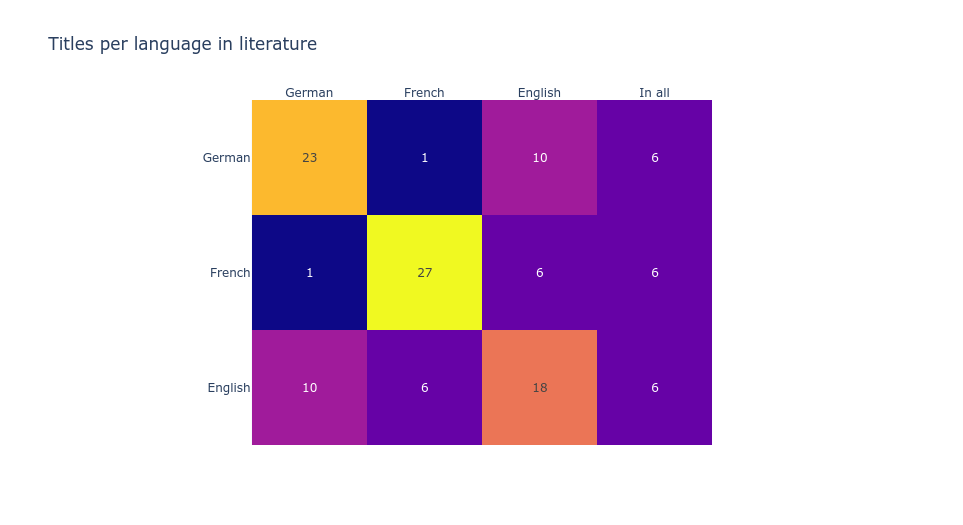

In [63]:
fig_lit = lang_matrix("Titles per language in literature",
                      lit_in_all, only_ger_lit, only_fren_lit,
                      only_eng_lit, ger_fren_lit, ger_eng_lit,
                      fren_eng_lit)
# Uncomment this line when actually running the notebook.
# fig_lit.show()

# Comment this line when actually running the notebook.
Image("output/figures/fig_lit.png")

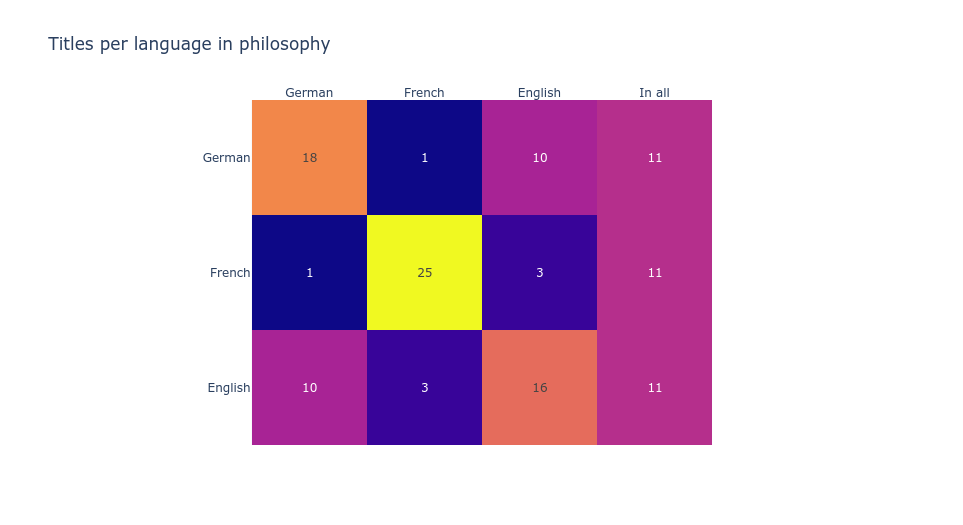

In [65]:
fig_phil = lang_matrix("Titles per language in philosophy",
                      phil_in_all, only_ger_phil, only_fren_phil,
                      only_eng_phil, ger_fren_phil, ger_eng_phil,
                      fren_eng_phil)

# Uncomment this line when actually running the notebook.
# fig_phil.show()

# Comment this line when actually running the notebook.
Image("output/figures/fig_phil.png")

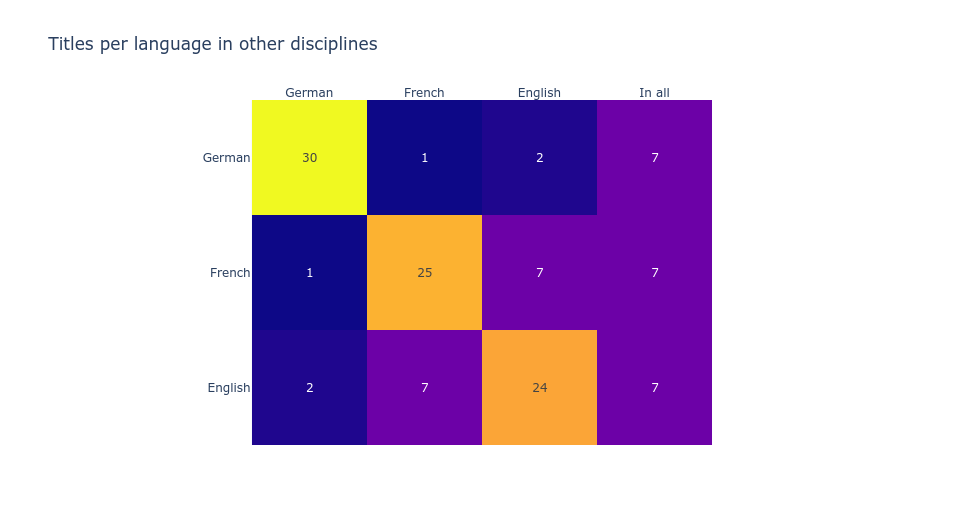

In [67]:
fig_oth = lang_matrix("Titles per language in other disciplines",
                      oth_in_all, only_ger_oth, only_fren_oth,
                      only_eng_oth, ger_fren_oth, ger_eng_oth,
                      fren_eng_oth)

# Uncomment this line when actually running the notebook.
# fig_oth.show()

# Comment this line when actually running the notebook.
Image("output/figures/fig_oth.png")